# Identify directories and Install Scoreboard19 and 

In [1]:
cd /home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


In [2]:
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'

In [3]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [4]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [5]:
os.chdir(mypwd[0])

In [6]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# Do the imports

In [7]:
import Scoreboard19 as S19
from tqdm import tqdm

import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil

#from ..Pycode import *
# from datagrab import *
# from scoresplots import *

# READ PREDICTIONS FROM COVID HUB

In [ ]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [ ]:
rm *.csv

In [ ]:
cd ..

In [ ]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

In [ ]:
cd data-processed

In [ ]:
!Rscript read_processed_dataONY.R #Read predictions

In [ ]:
newPath = shutil.copy('all_dataONY.csv', 
                      mypwd[0])

In [ ]:
os.chdir(mypwd[0])
newPath = shutil.move('all_dataONY.csv', 
                      '../Data/')

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

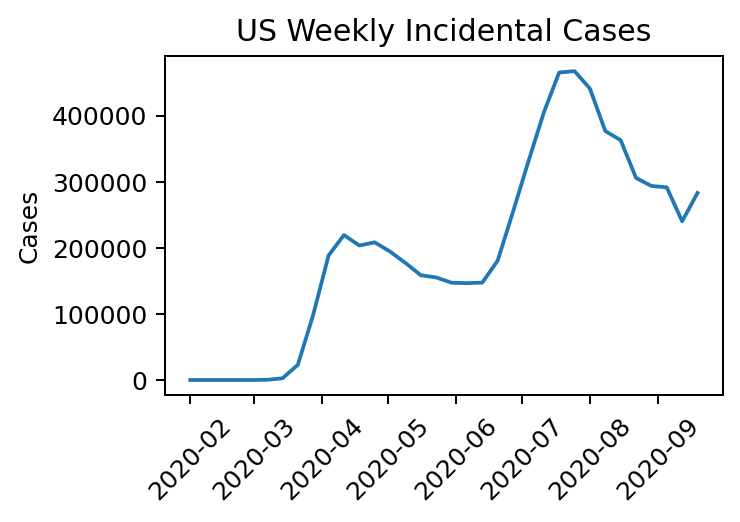

In [18]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases)

In [ ]:
S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')

Maximum % conversion error:
2.226586401542141
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. Columbia_UNC:SurvCon
3. Covid19Sim:Simulator
4. UCLA:SuEIR
5. JHU_IDD:CovidSP
6. IowaStateLW:STEM
7. CovidAnalytics:DELPHI
8. USACE:ERDC_SEIR
9. QJHong:Encounter
10. LNQ:ens1
11. UMich:RidgeTfReg
12. COVIDhub:ensemble
13. IHME:CurveFit
14. DDS:NBDS
15. RobertWalraven:ESG
16. CU:nochange
17. CU:select
18. CU:scenario_mid
19. CU:scenario_high
20. CU:scenario_low
21. CEID:Walk
22. Karlen:pypm
23. JHUAPL:Bucky
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


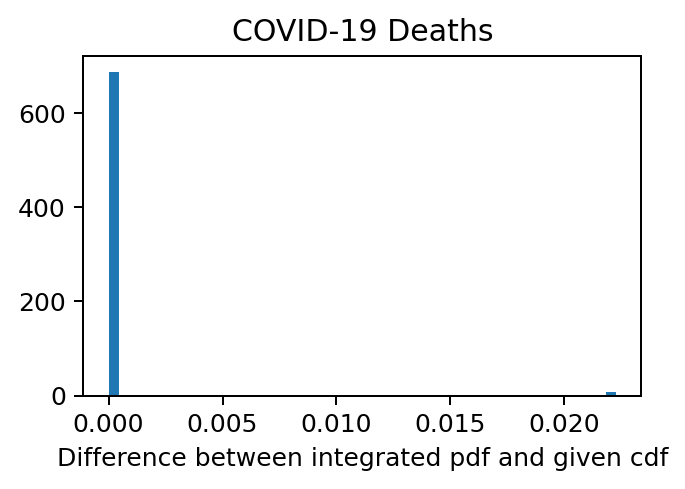

In [8]:
ScoreboardCases = pd.read_pickle('../Data/ScoreboardCases.pkl')
S19.plotdifferencescdfpdf(ScoreboardCases)
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

In [ ]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [ ]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

<Figure size 2400x2400 with 0 Axes>

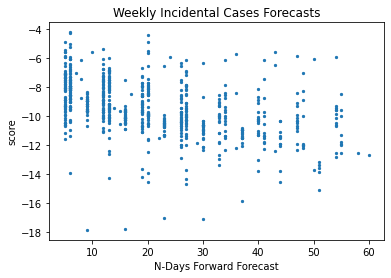

<Figure size 2400x2400 with 0 Axes>

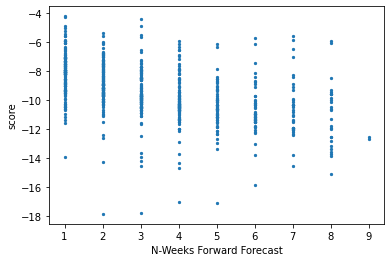

In [16]:
S19.plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

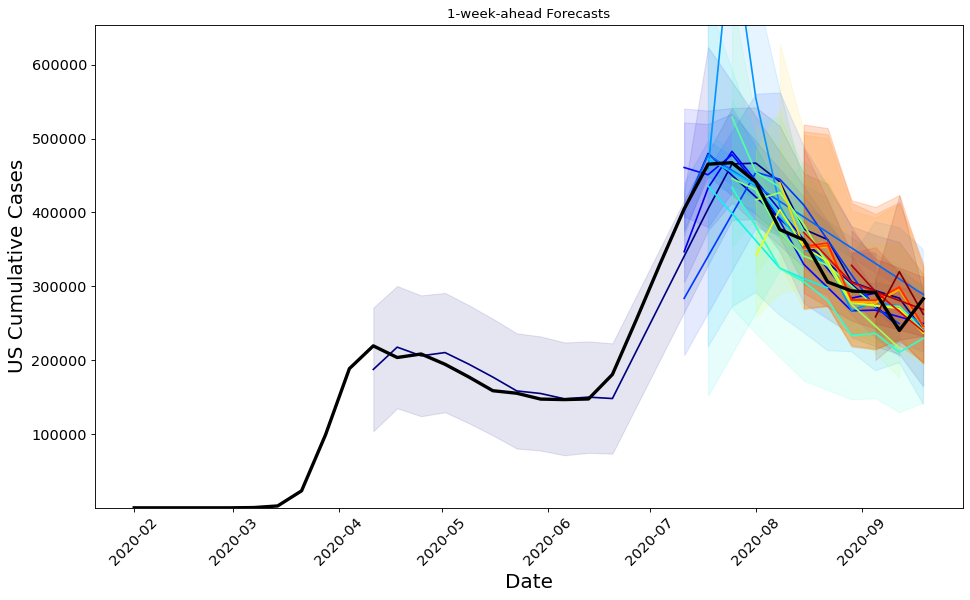

In [19]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

In [ ]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

In [ ]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk')

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

In [ ]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths)

In [ ]:
S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

Maximum % conversion error:
2.4715811054151438
Unique models in the scoreboard:
0. Imperial:ensemble2
1. Imperial:ensemble1
2. IHME:CurveFit
3. CU:select
4. CU:scenario_mid
5. CU:scenario_low
6. CU:scenario_high
7. CU:nochange
8. COVIDhub:ensemble
9. COVIDhub:baseline
10. MOBS:GLEAM_COVID
11. UMass:ExpertCrowd
12. YYG:ParamSearch
13. UT:Mobility
14. JHU_IDD:CovidSP
15. LANL:GrowthRate
16. CovidAnalytics:DELPHI
17. UCLA:SuEIR
18. GT:DeepCOVID
19. UMass:MechBayes
20. IowaStateLW:STEM
21. PSI:DRAFT
22. UA:EpiCovDA
23. Covid19Sim:Simulator
24. USACE:ERDC_SEIR
25. Auquan:SEIR
26. OliverWyman:Navigator
27. CovidActNow:SEIR_CAN
28. epiforecasts:ensemble1
29. MITCovAlliance:SIR
30. NotreDame:mobility
31. QJHong:Encounter
32. Columbia_UNC:SurvCon
33. UMich:RidgeTfReg
34. RobertWalraven:ESG
35. Karlen:pypm
36. DDS:NBDS
37. RPI_UW:Mob_Collision
38. CEID:Walk
39. LNQ:ens1
40. UCM_MESALab:FoGSEIR
41. WalmartLabsML:LogForecasting
42. SteveMcConnell:CovidComplete
43. UCSD_NEU:DeepGLEAM
44. JHUAPL:Buc

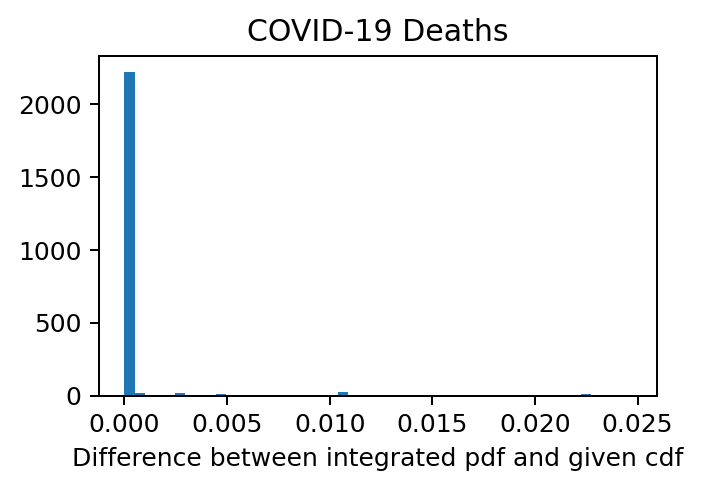

In [9]:
ScoreboardDeaths = pd.read_pickle('../Data/ScoreboardDeaths.pkl')
S19.plotdifferencescdfpdf(ScoreboardDeaths)
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

In [ ]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [ ]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [ ]:
S19.plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

In [ ]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

In [ ]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline')

# More Scores

In [ ]:
Scoreboard.replace([np.inf, -np.inf], np.nan,inplace=True)
Scoreboard.dropna(inplace=True)
Scoreboard = Scoreboard.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='last').copy()
Scoreboard.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboard['score'] = 1
Scoreboard['CIHI']=pd.DataFrame(Scoreboard['value'].to_list()).max(axis=1)
Scoreboard['CILO']=pd.DataFrame(Scoreboard['value'].to_list()).min(axis=1)
Scoreboard['PE']=pd.DataFrame(Scoreboard['value'].to_list()).median(axis=1)
Scoreboard['scorecontr']=np.exp(-Scoreboard['score']/2)
Scoreboard['CIHI_W']=Scoreboard['CIHI']*Scoreboard['scorecontr']
Scoreboard['CILO_W']=Scoreboard['CILO']*Scoreboard['scorecontr']
Scoreboard['PE_W']=Scoreboard['PE']*Scoreboard['scorecontr']
Scoreboard['P_W']=Scoreboard['p']*Scoreboard['scorecontr']
Scoreboard.head(3)

In [ ]:
Scoreboardlate = Scoreboard[Scoreboard['forecast_date']>='2020-07-01'].copy()
Scoreboardlate.head(3)

In [ ]:
frozenscores = Scoreboard[Scoreboard['forecast_date']<'2020-07-01'].groupby('model')['score'].mean().reset_index()
frozenscores
rename_dict = frozenscores.set_index('model').to_dict()['score']

Scoreboardlate['score'] = np.nan
Scoreboardlate['score'] = Scoreboardlate.set_index(['model']).index.map(rename_dict.get)
Scoreboardlate.dropna(inplace=True)

Scoreboardlate.replace([np.inf, -np.inf], np.nan,inplace=True)
Scoreboardlate['scorecontr']=np.exp(-Scoreboardlate['score']/2)
Scoreboardlate['CIHI_W']=Scoreboardlate['CIHI']*Scoreboardlate['scorecontr']
Scoreboardlate['CILO_W']=Scoreboardlate['CILO']*Scoreboardlate['scorecontr']
Scoreboardlate['PE_W']=Scoreboardlate['PE']*Scoreboardlate['scorecontr']
Scoreboardlate['P_W']=Scoreboardlate['p']*Scoreboardlate['scorecontr']

In [ ]:
# Scoreboard.to_csv('Scoreboard.csv')
scoreweighted = (Scoreboardlate.groupby(['target_end_date'],
                                        as_index=False)[['scorecontr','CIHI_W','CILO_W','PE_W', 'P_W','deaths']].agg(lambda x: list(x)))
scoreweighted['sumW']=pd.DataFrame(scoreweighted['scorecontr'].to_list()).sum(axis=1)
scoreweighted['avgCIHI']=pd.DataFrame(scoreweighted['CIHI_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgCILO']=pd.DataFrame(scoreweighted['CILO_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgPE']=pd.DataFrame(scoreweighted['PE_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgP']=2*np.log(pd.DataFrame(scoreweighted['P_W'].to_list()).sum(axis=1)/scoreweighted['sumW'])+1+np.log(pd.DataFrame(scoreweighted['deaths'].to_list()).min(axis=1))+np.log(2*np.pi)
scoreweighted.to_csv('ScorelateWeightedProj.csv')

In [ ]:
# Scoreboard.to_csv('Scoreboard.csv')
scoreweighted = (Scoreboard.groupby(['target_end_date'],
                                        as_index=False)[['scorecontr','CIHI_W','CILO_W','PE_W', 'P_W','deaths']].agg(lambda x: list(x)))
scoreweighted['sumW']=pd.DataFrame(scoreweighted['scorecontr'].to_list()).sum(axis=1)
scoreweighted['avgCIHI']=pd.DataFrame(scoreweighted['CIHI_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgCILO']=pd.DataFrame(scoreweighted['CILO_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgPE']=pd.DataFrame(scoreweighted['PE_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgP']=2*np.log(pd.DataFrame(scoreweighted['P_W'].to_list()).sum(axis=1)/scoreweighted['sumW'])+1+np.log(pd.DataFrame(scoreweighted['deaths'].to_list()).min(axis=1))+np.log(2*np.pi)
scoreweighted.to_csv('ScoreWeightedProj.csv')

In [ ]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboard['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 10
#for curmod in models:
curmod = 'Score Weighted Ensemble'    
dates = scoreweighted.target_end_date
P = scoreweighted.avgP
# CIlow = scoreweighted.avgCILO
# CIhi = scoreweighted.avgCIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

#plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    

plt.plot(dates,P,color=modcol,label=curmod,linewidth=4.0)
# plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)

# plt.ylim([0,260000])
plt.ylabel('Score: US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left')
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/Score_ScoreWeighted4wkAhead_CUMDEATH.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboard['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 10
#for curmod in models:
curmod = 'Score Weighted Ensemble'    
dates = scoreweighted.target_end_date
PE = scoreweighted.avgPE
CIlow = scoreweighted.avgCILO
CIhi = scoreweighted.avgCIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    

plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)

plt.axvline(x=datetime.strptime('Jul 01 2020', '%b %d %Y'),color='r',linestyle='dashed',label='Scoring phase completed')

plt.ylim([0,260000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left')
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/ScoreWeighted4wkAhead_CUMDEATH.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
Scoreboardx = Scoreboard[(Scoreboard['forecast_date'] > '2020-06-27') & (Scoreboard['forecast_date'] < '2020-07-01')].copy()
Scoreboardx.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboardx['CIHI']=pd.DataFrame(Scoreboardx['value'].to_list()).max(axis=1)
Scoreboardx['CILO']=pd.DataFrame(Scoreboardx['value'].to_list()).min(axis=1)
Scoreboardx['PE']=pd.DataFrame(Scoreboardx['value'].to_list()).median(axis=1)
Scoreboardxx = Scoreboardx.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='last').copy()
Scoreboardxx.reset_index(inplace=True)
Scoreboardxx.sort_values(by=['target_end_date'],inplace=True)
# Scoreboardx.head(3)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboardxx['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 0
for curmod in models:
    
    dates = Scoreboardxx[Scoreboardxx['model']==curmod].target_end_date
    PE = Scoreboardxx[Scoreboardxx['model']==curmod].PE
    CIlow = Scoreboardxx[Scoreboardxx['model']==curmod].CILO
    CIhi = Scoreboardxx[Scoreboardxx['model']==curmod].CIHI
    
    modcol = (colors[i].tolist()[0],
              colors[i].tolist()[1],
              colors[i].tolist()[2])
    
    plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
    #plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)
    i = i+1

plt.axvline(x=datetime.strptime('Jun 28 2020', '%b %d %Y'),color='r',linestyle='dashed')    
plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    
plt.ylim([0,230000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc=(1.04,0),labelspacing=.9)
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/CUMDEATH_sinceJUN27.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
Scoreboardx = Scoreboard[(Scoreboard['forecast_date'] > '2020-06-27') & (Scoreboard['forecast_date'] < '2020-07-01')].copy()
Scoreboardx.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboardx['CIHI']=pd.DataFrame(Scoreboardx['value'].to_list()).max(axis=1)
Scoreboardx['CILO']=pd.DataFrame(Scoreboardx['value'].to_list()).min(axis=1)
Scoreboardx['PE']=pd.DataFrame(Scoreboardx['value'].to_list()).median(axis=1)
Scoreboardxx = Scoreboardx.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='first').copy()
Scoreboardxx.reset_index(inplace=True)
Scoreboardxx.sort_values(by=['target_end_date'],inplace=True)
# Scoreboardx.head(3)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboardxx['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 5
#for curmod in models:
curmod = 'USACE:ERDC_SEIR'    
dates = Scoreboardxx[Scoreboardxx['model']==curmod].target_end_date
PE = Scoreboardxx[Scoreboardxx['model']==curmod].PE
CIlow = Scoreboardxx[Scoreboardxx['model']==curmod].CILO
CIhi = Scoreboardxx[Scoreboardxx['model']==curmod].CIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)
i = i+1

plt.axvline(x=datetime.strptime('Jun 28 2020', '%b %d %Y'),color='r',linestyle='dashed')    
plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    
plt.ylim([0,230000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/'+curmod+'_CUMDEATH_sinceJUN27.png',
            dpi=300,
           bbox_inches = 'tight')

# ANALYSIS OF SCORES

## Plots by date forecast made

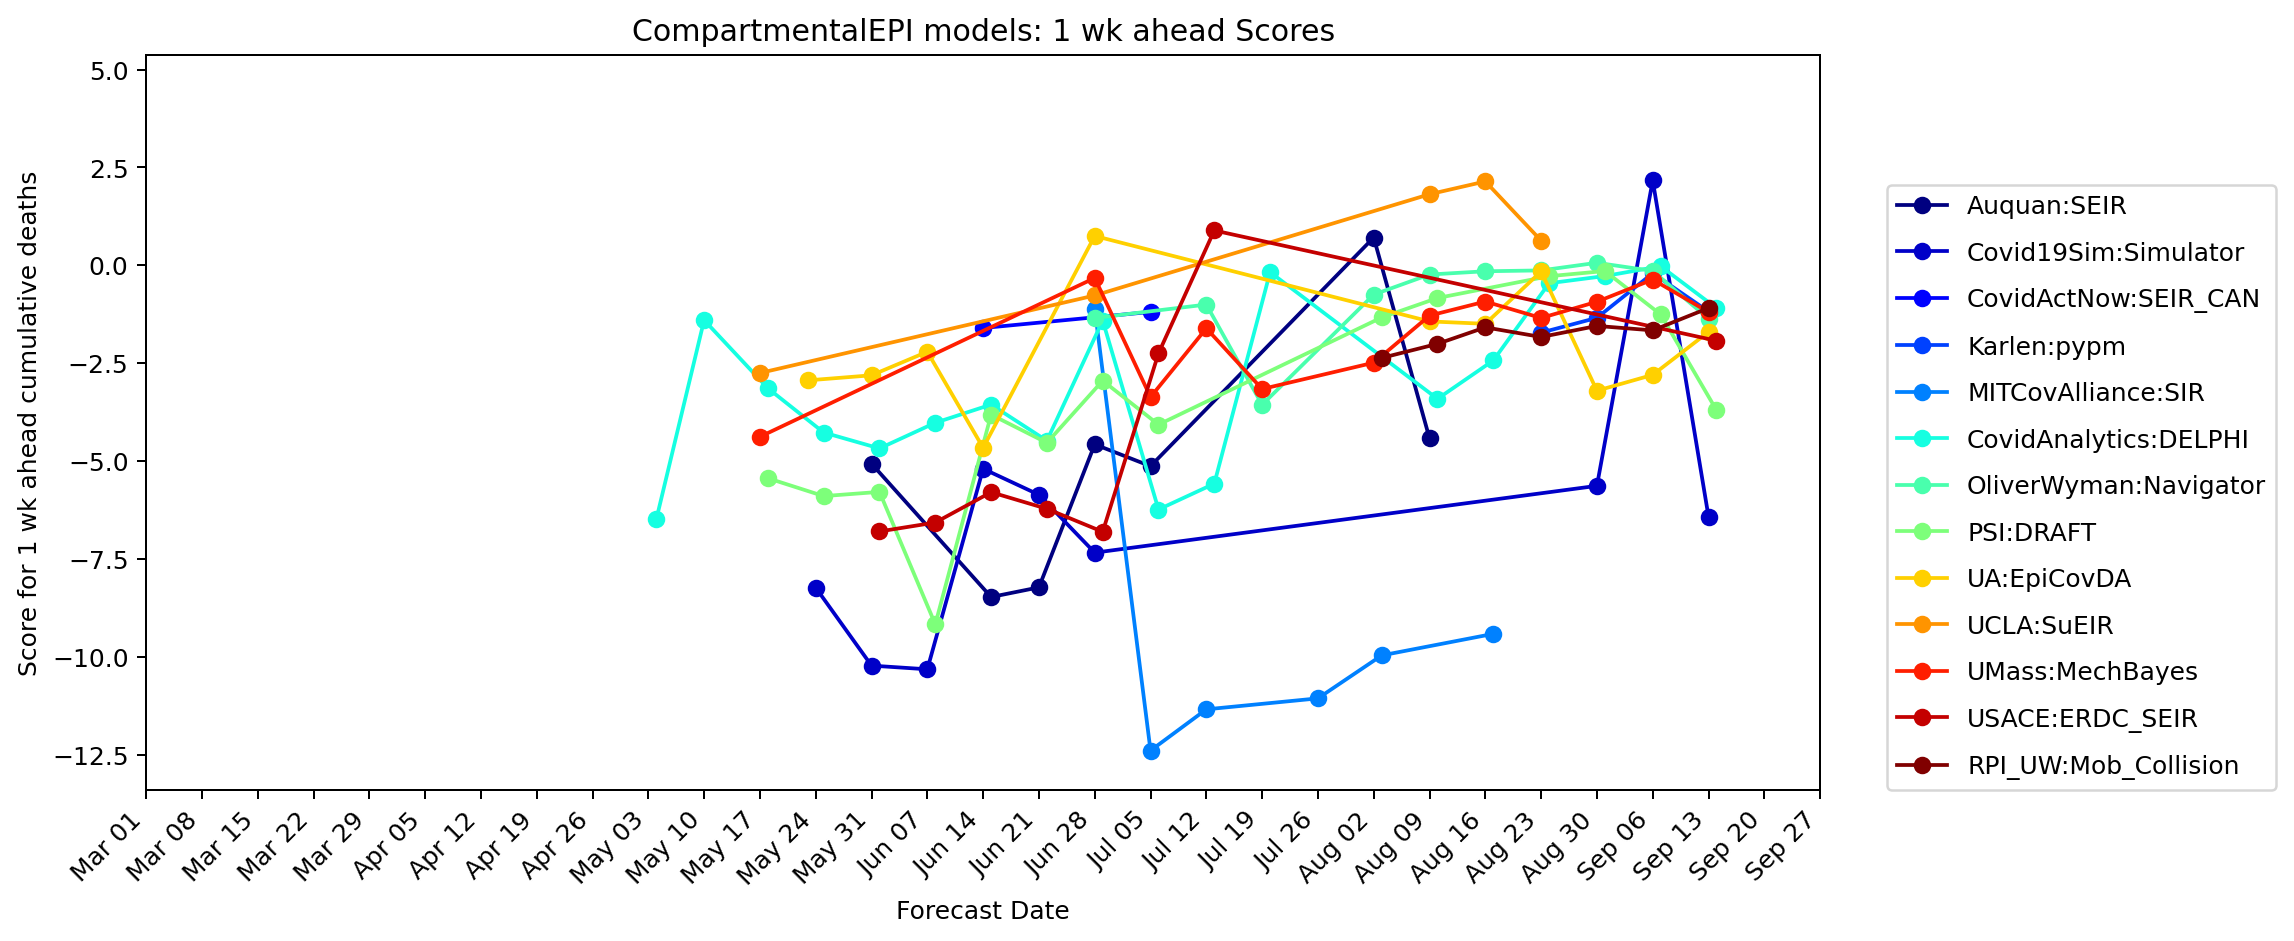

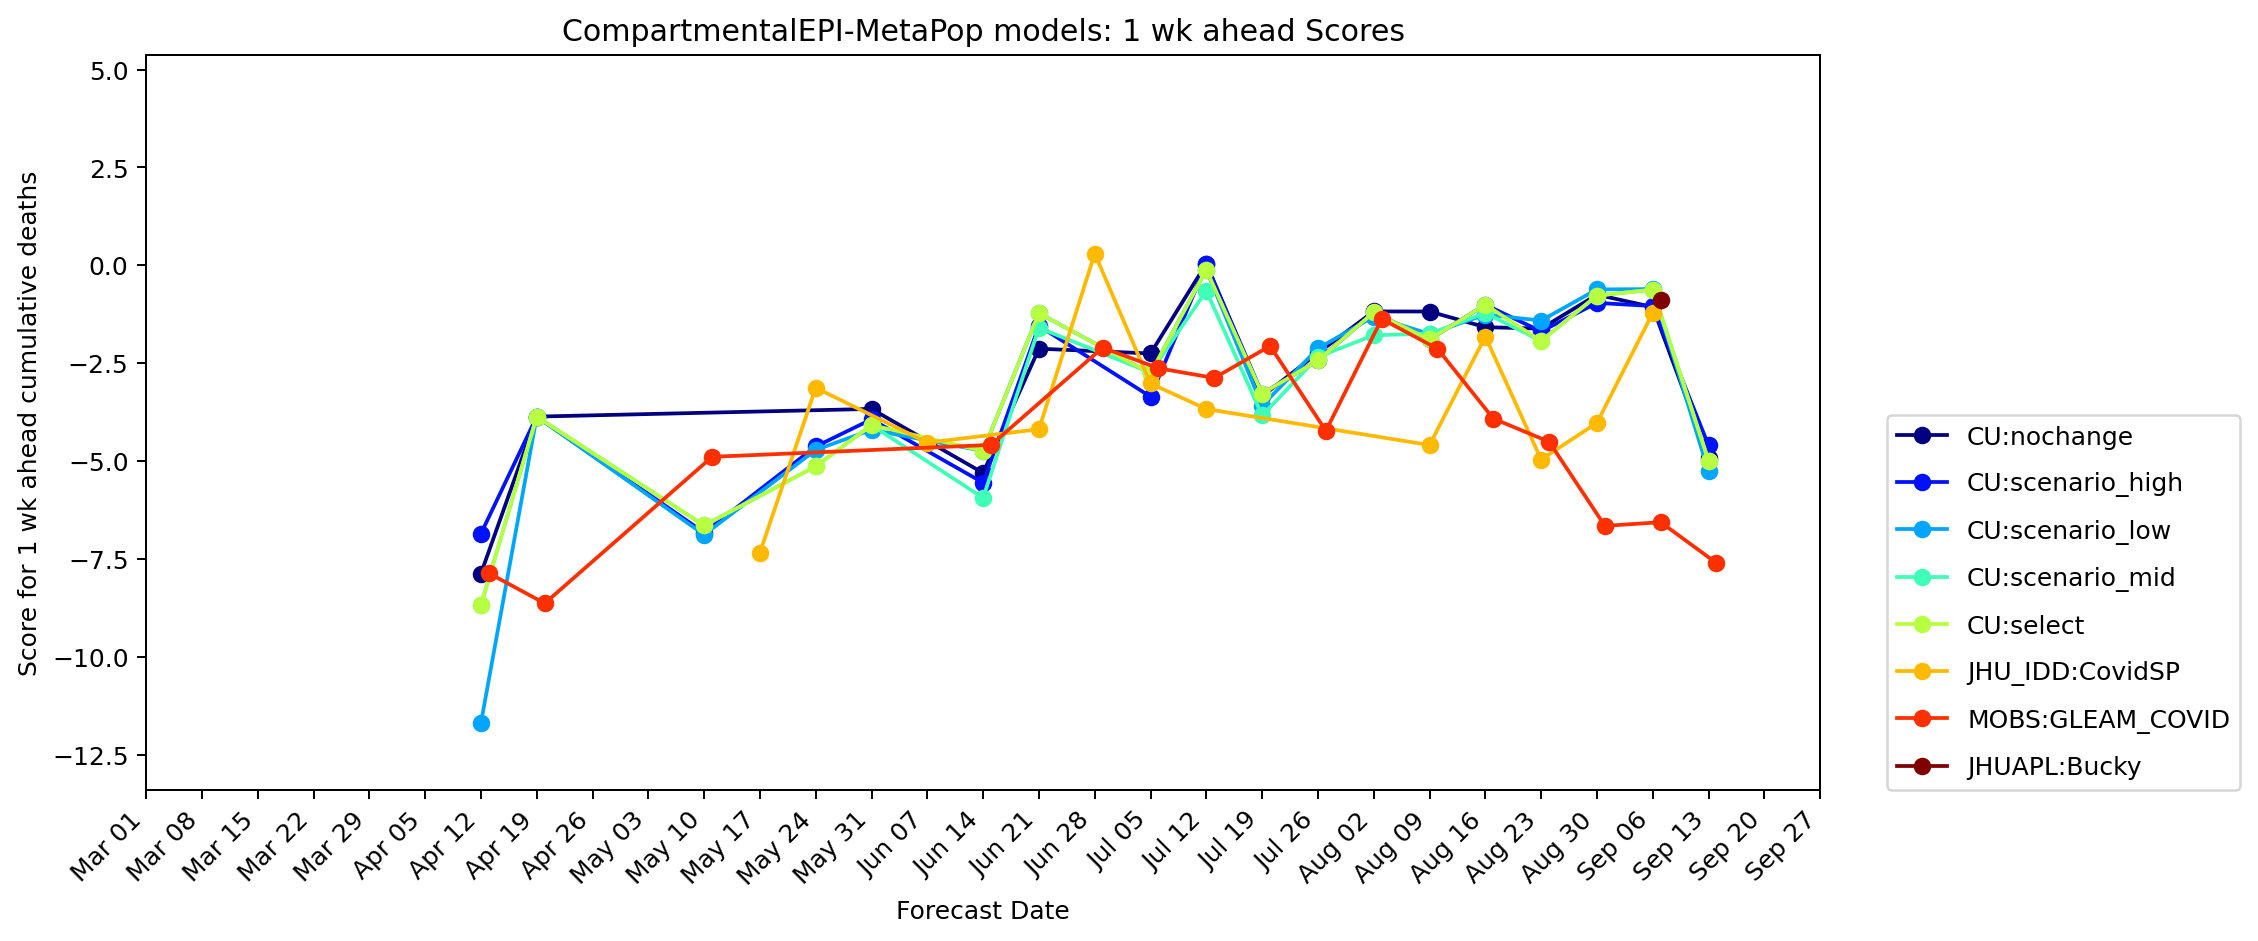

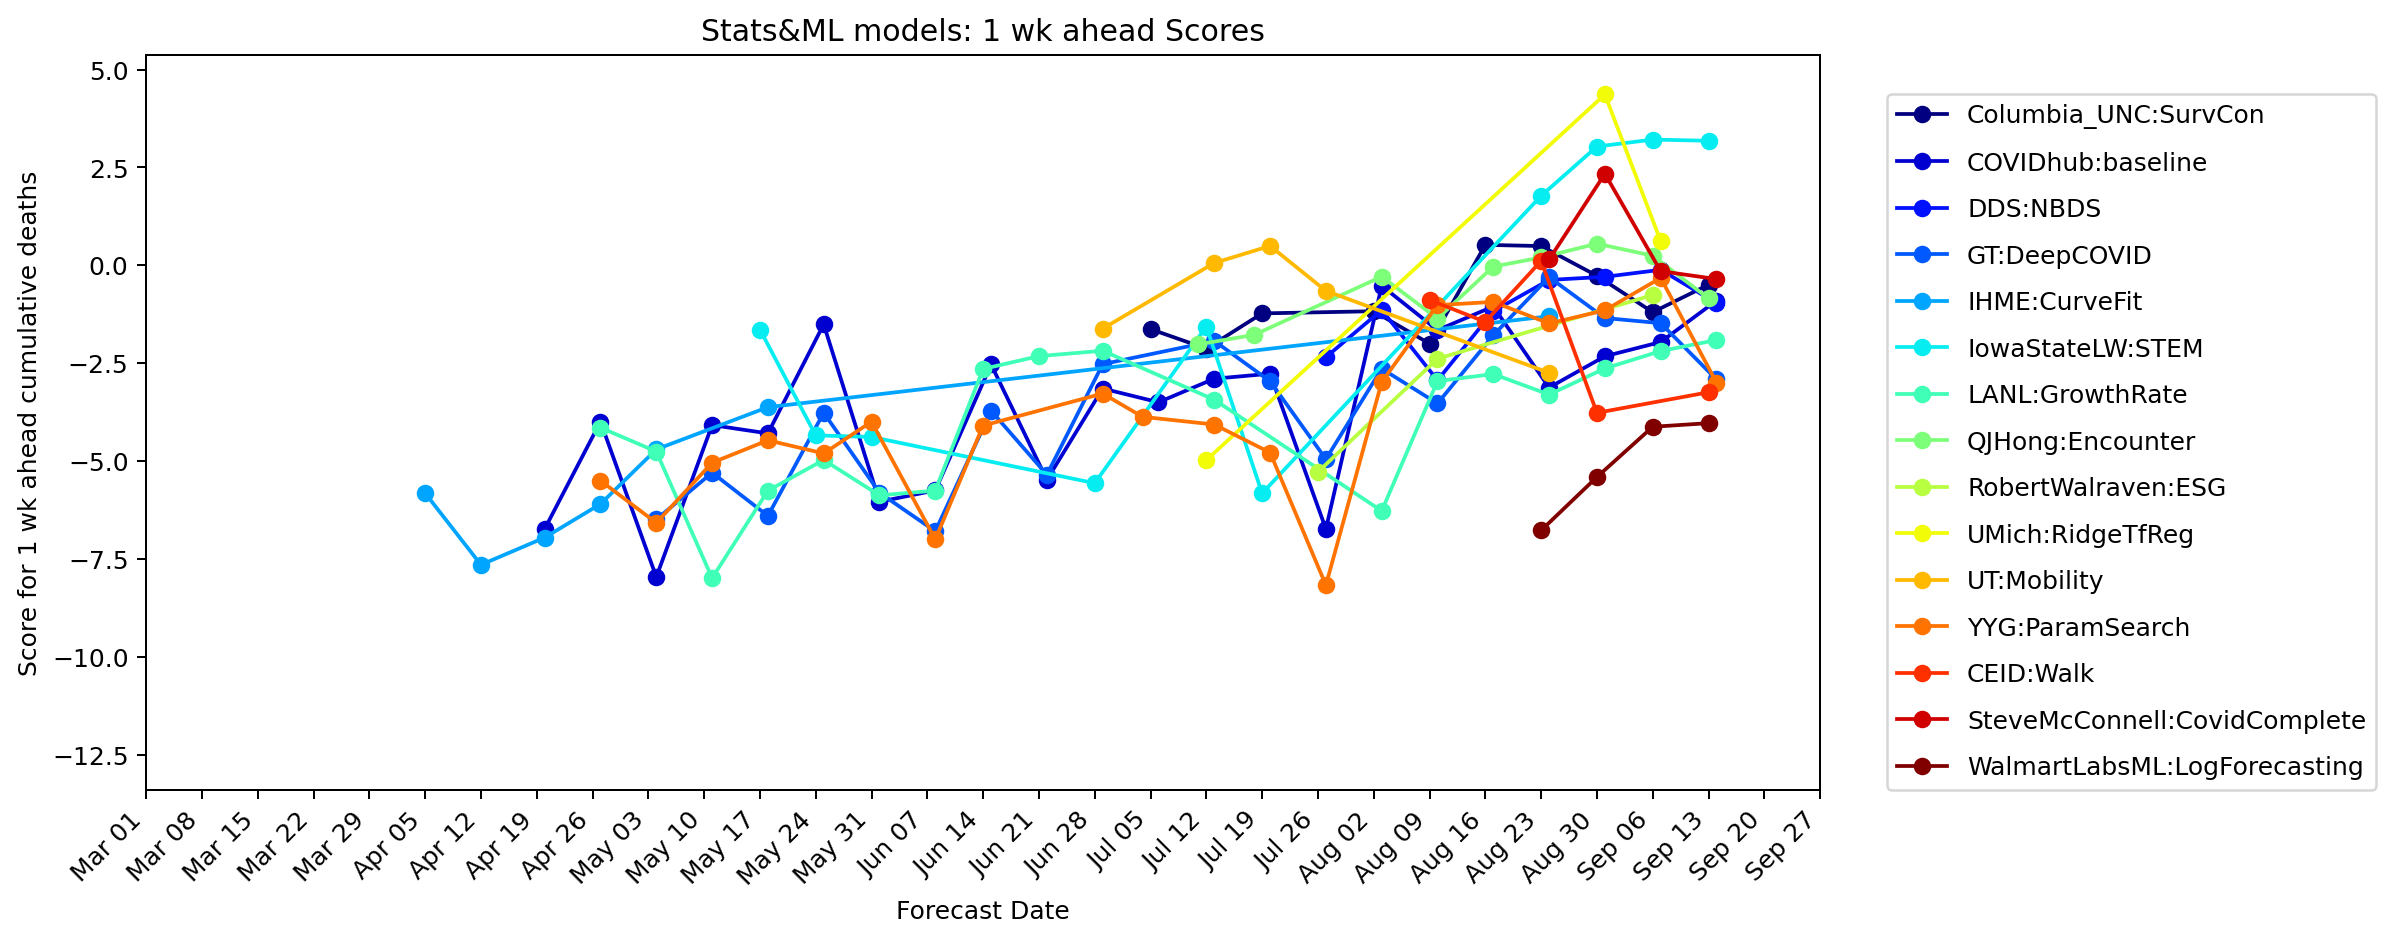

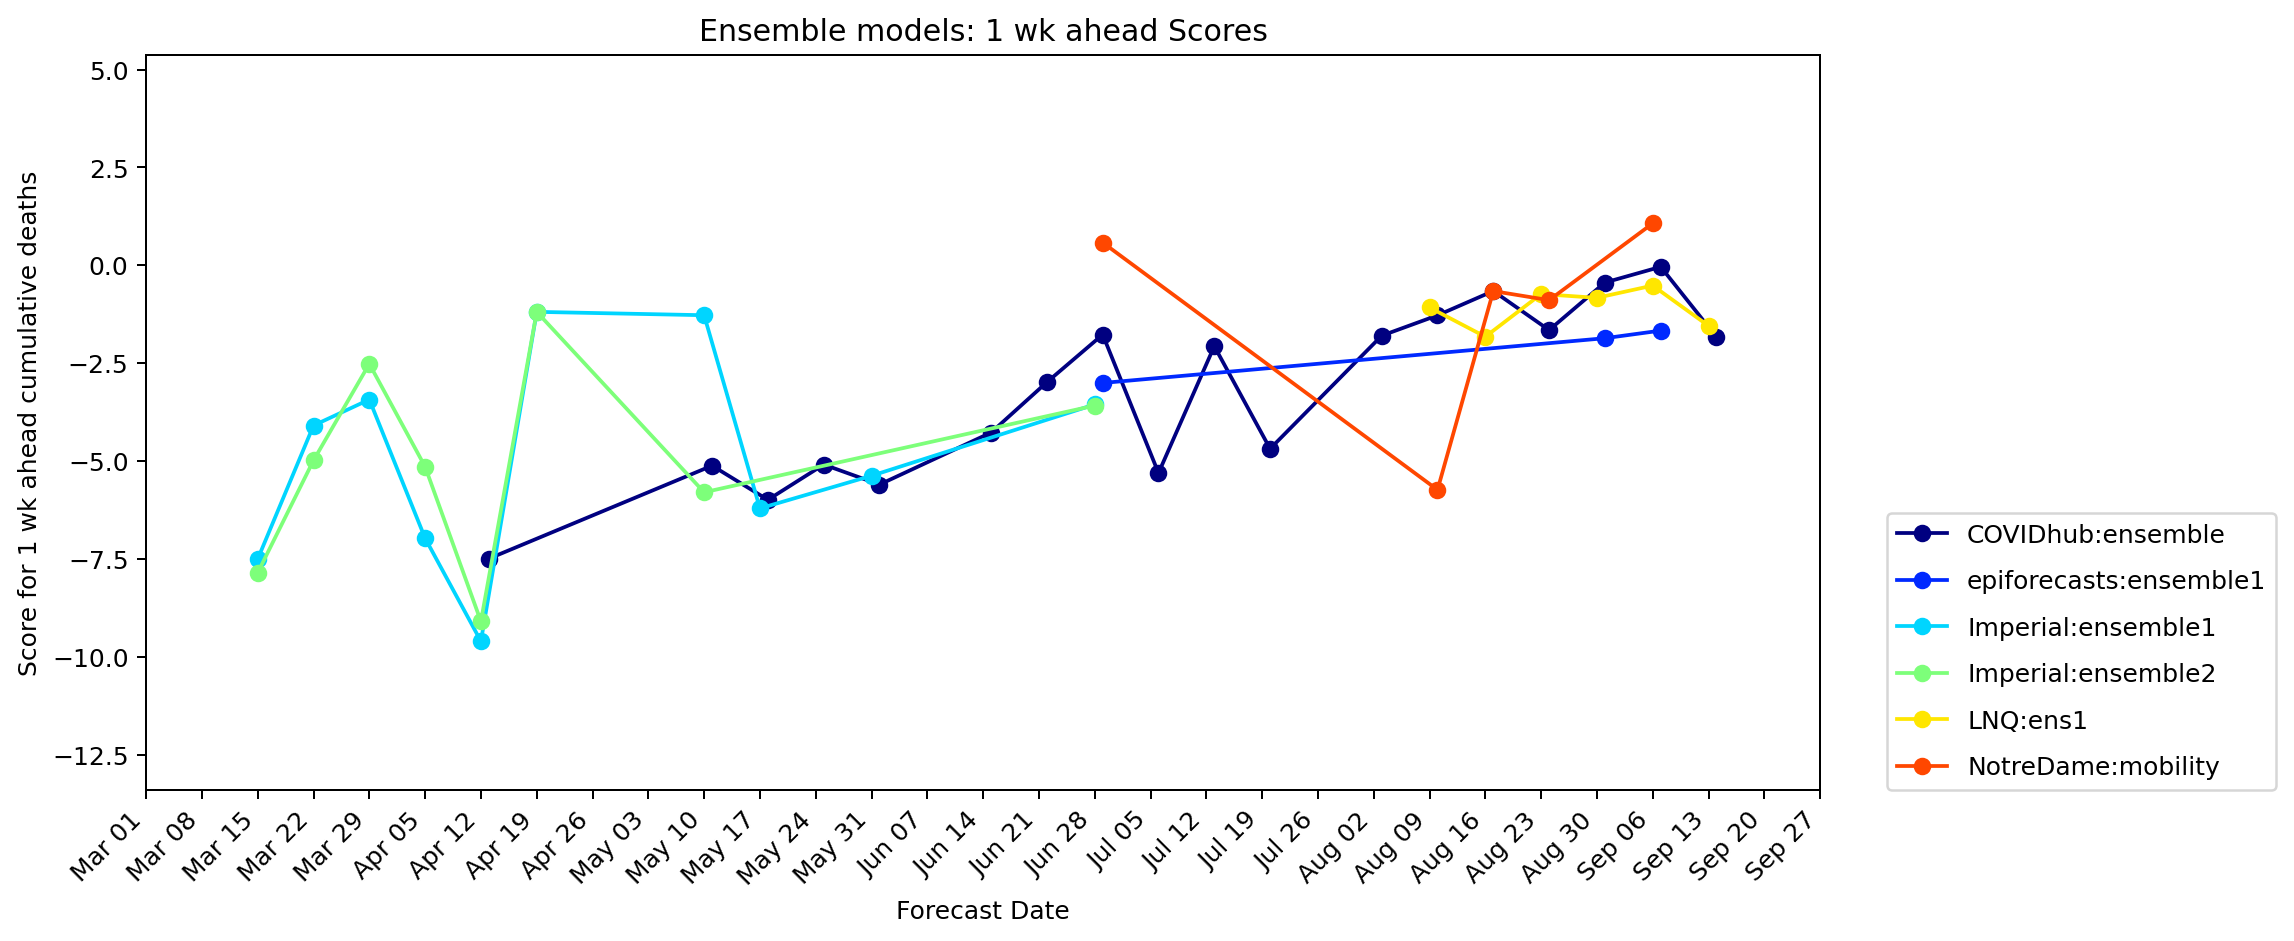

In [14]:
S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 1, 'Death')

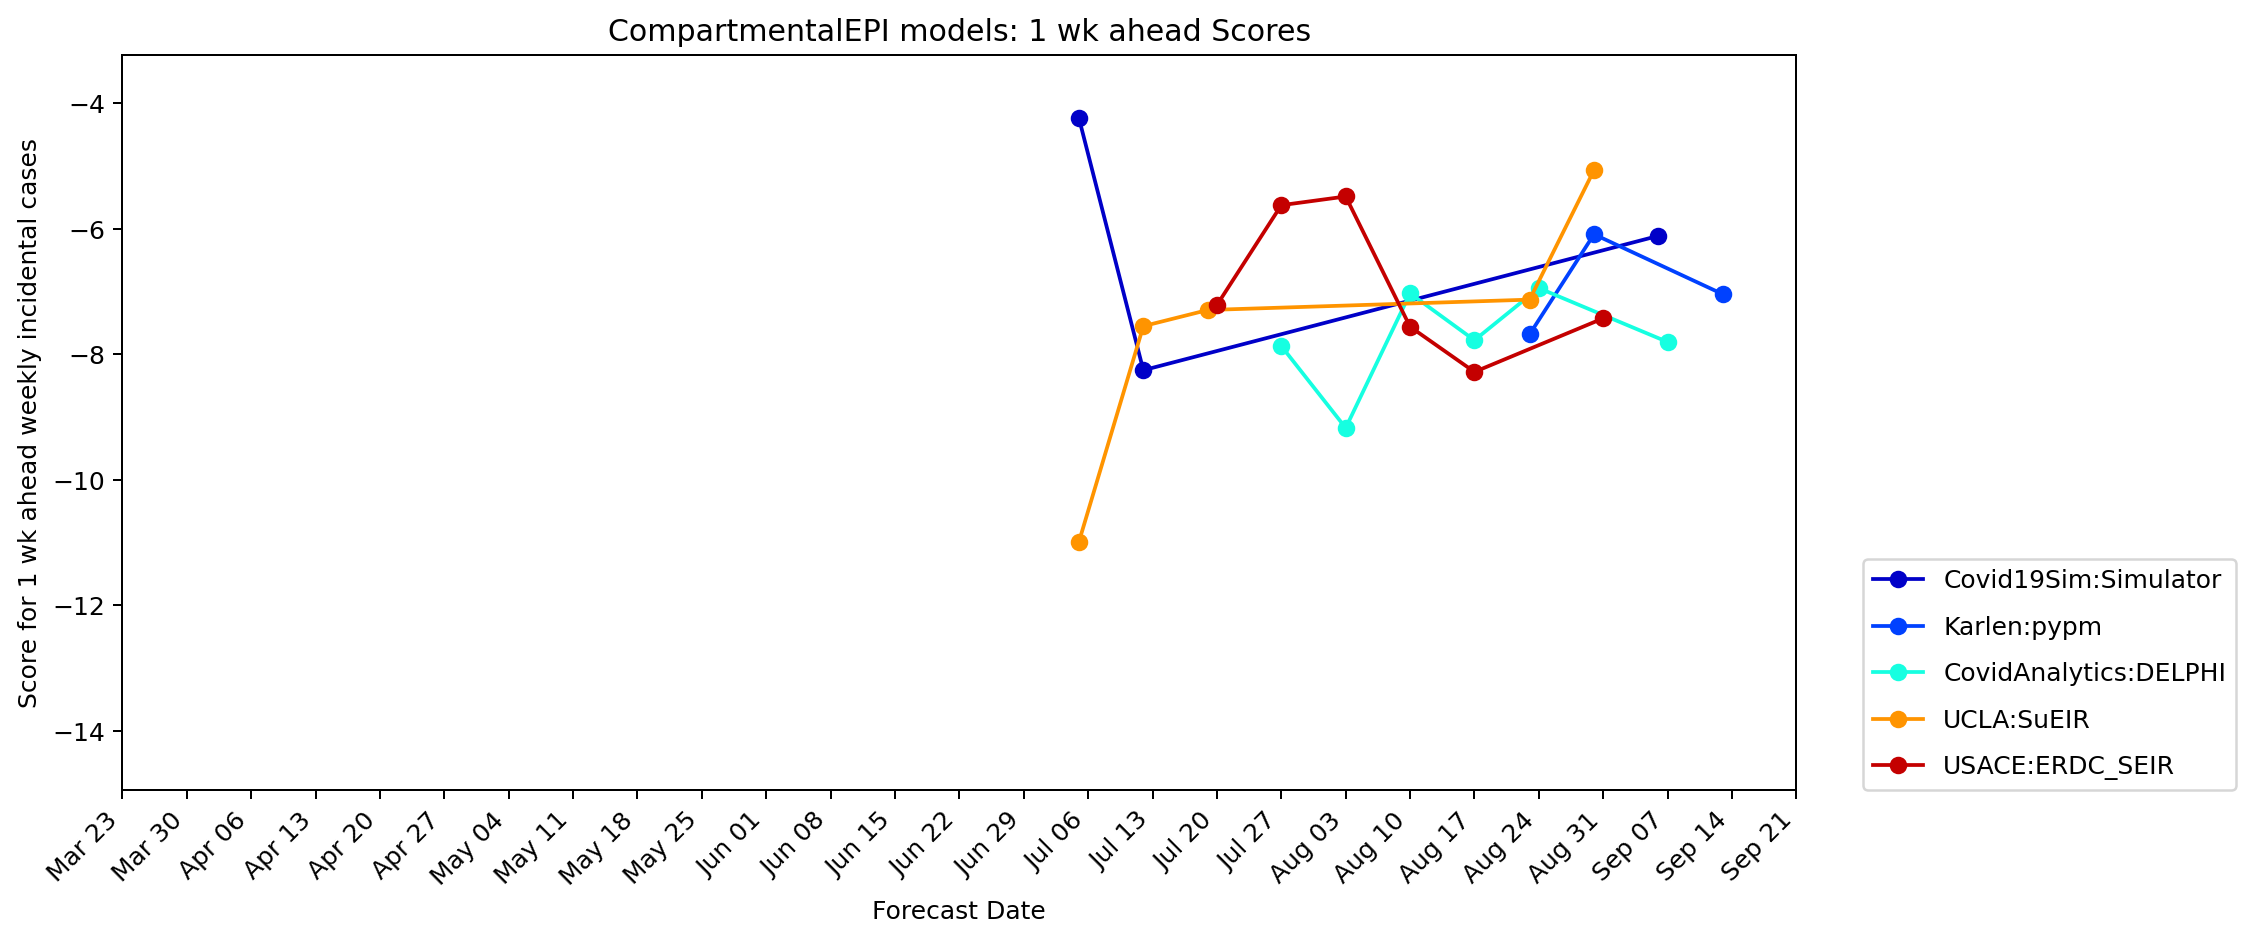

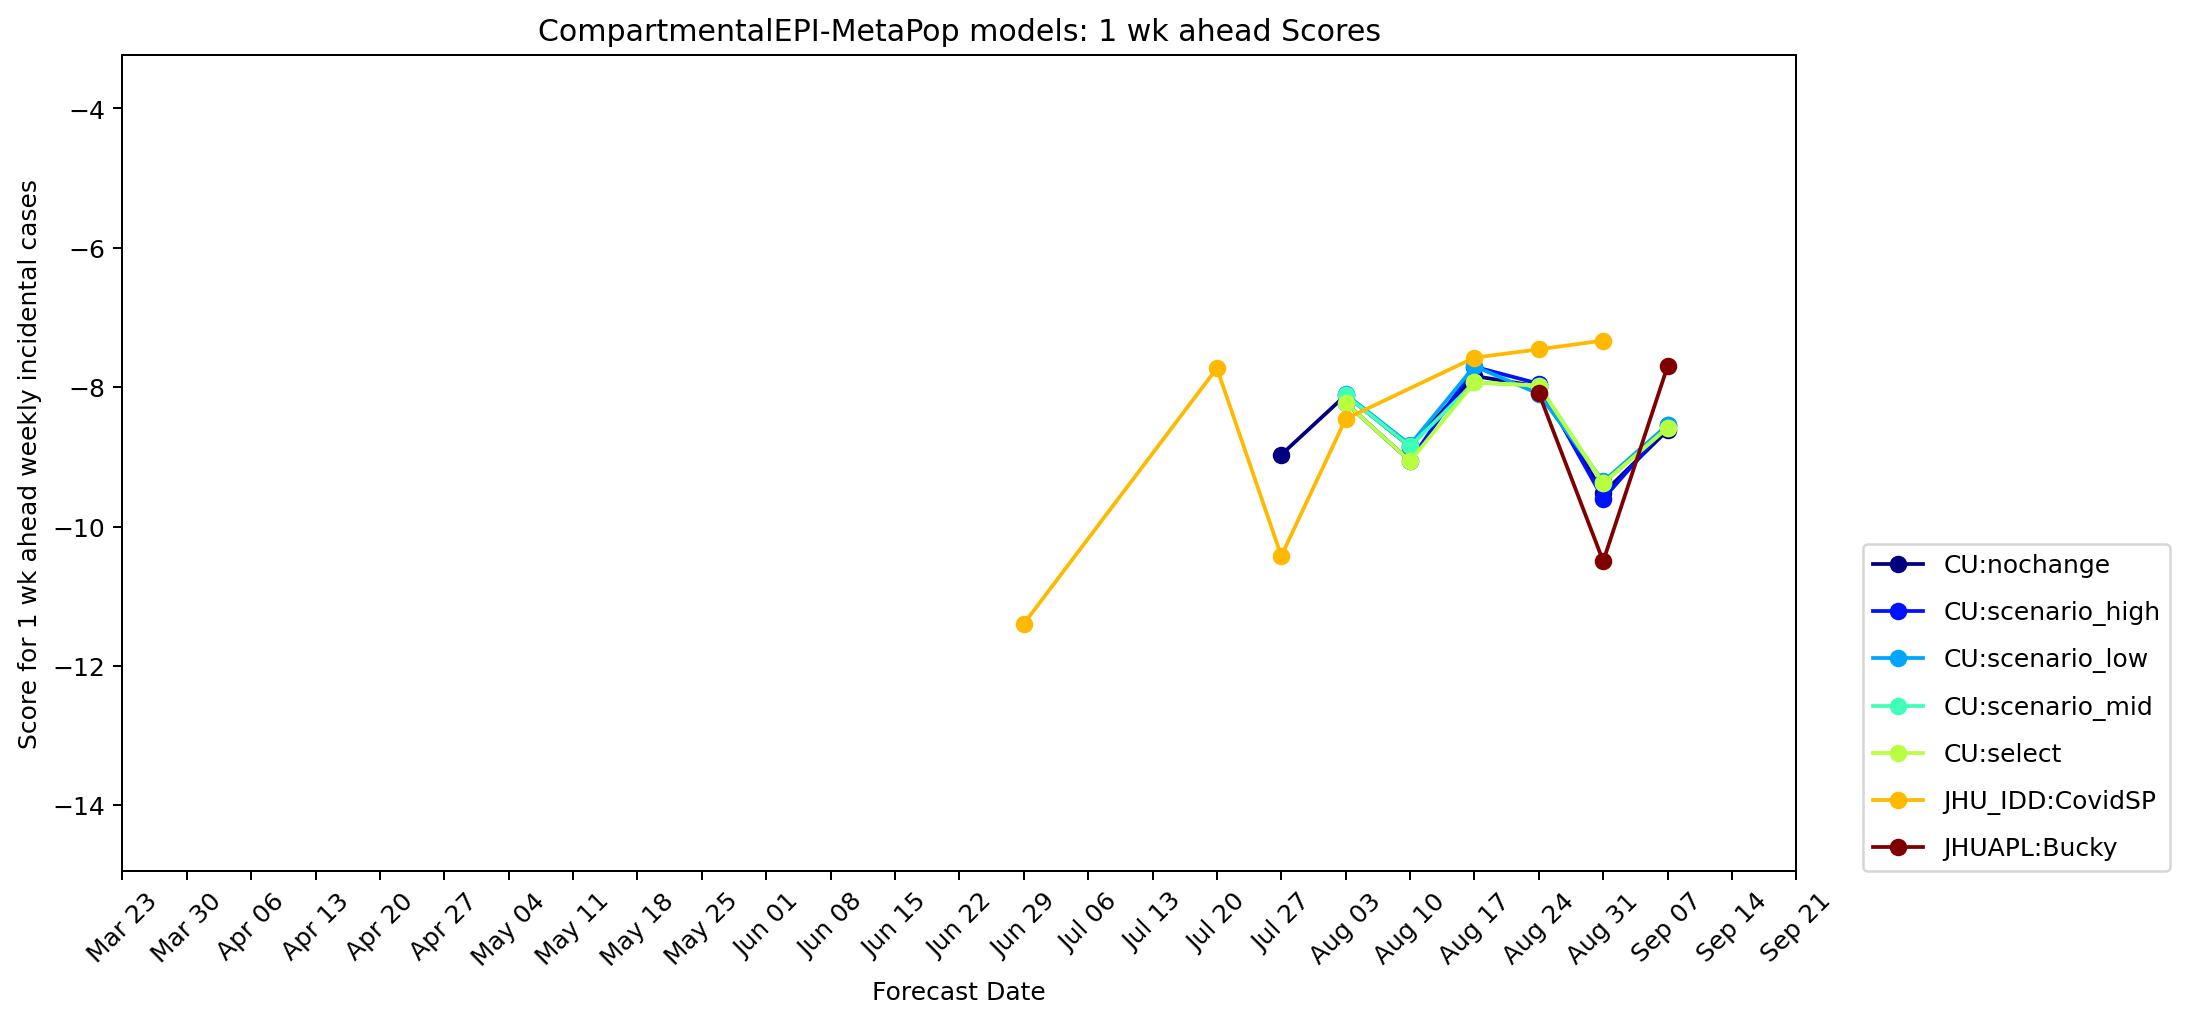

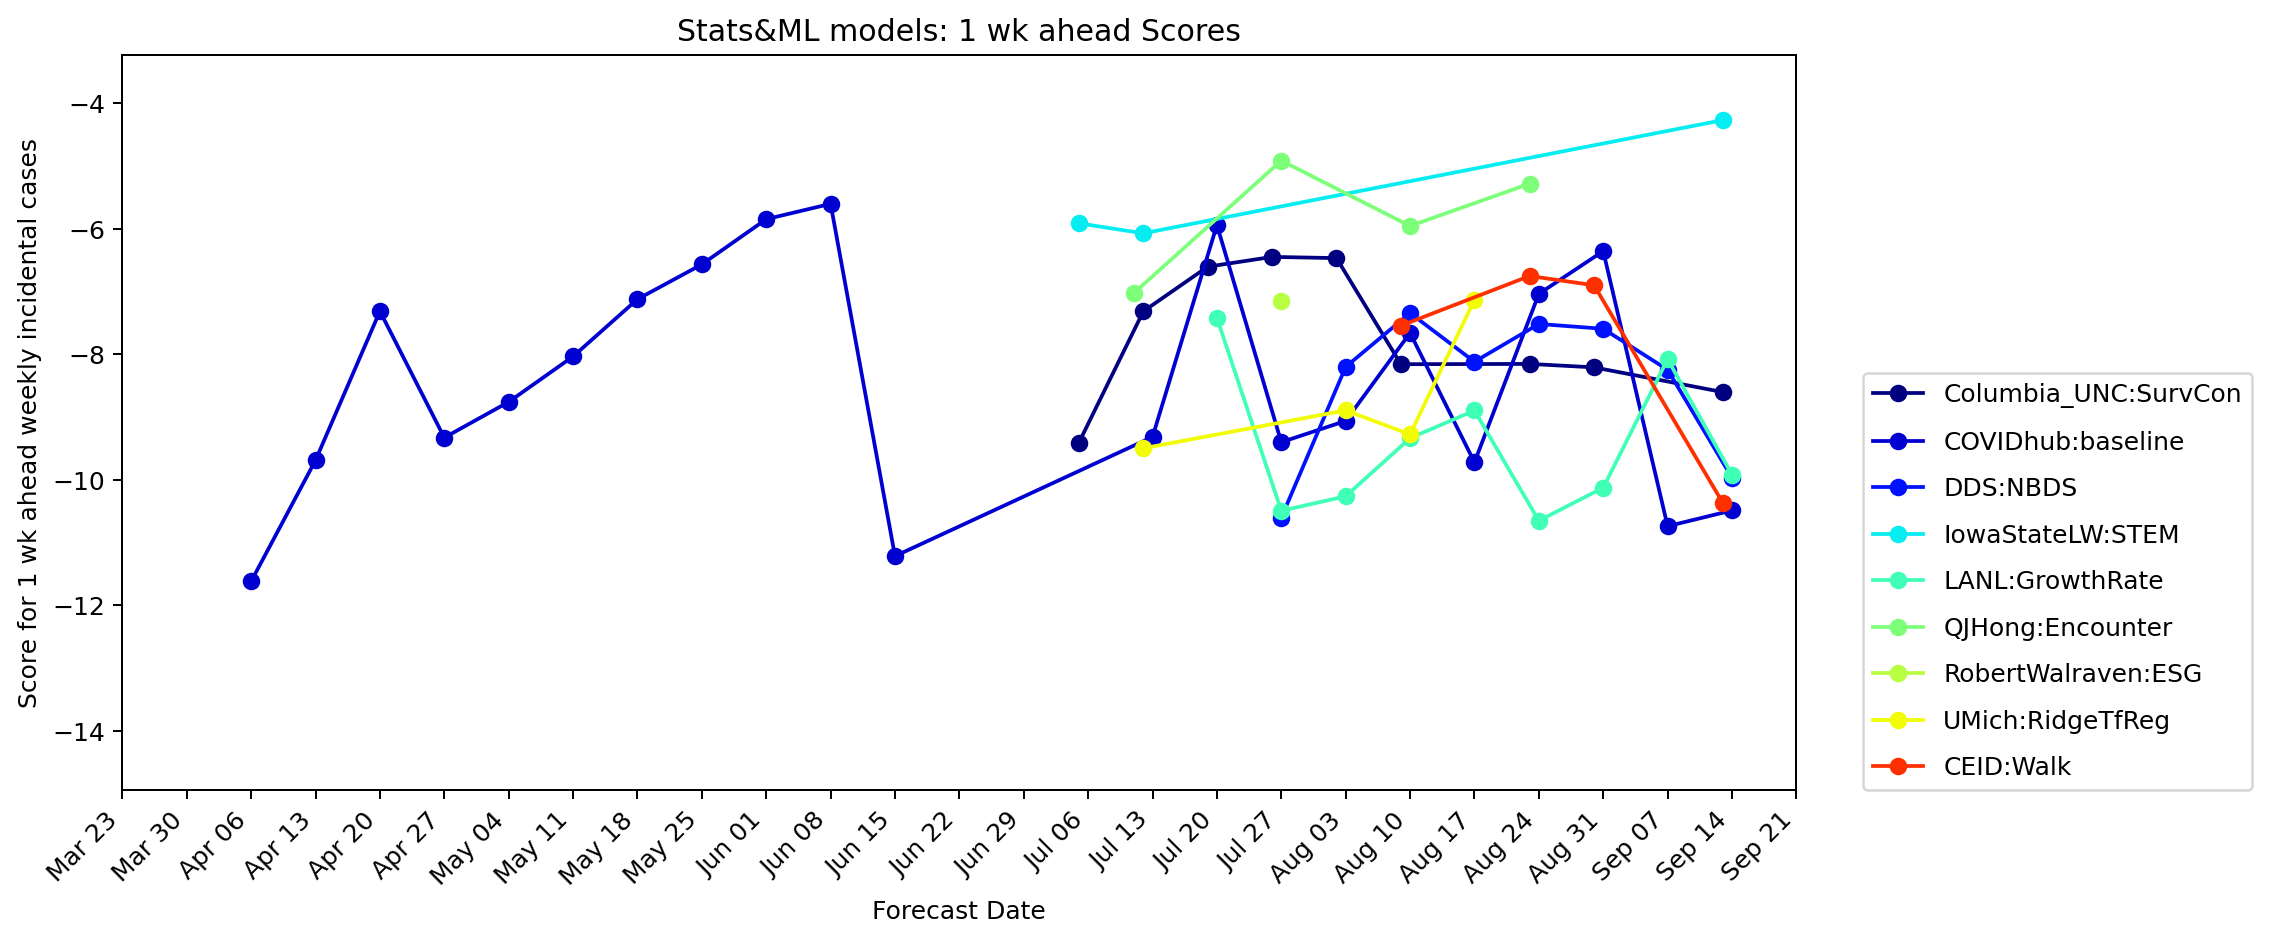

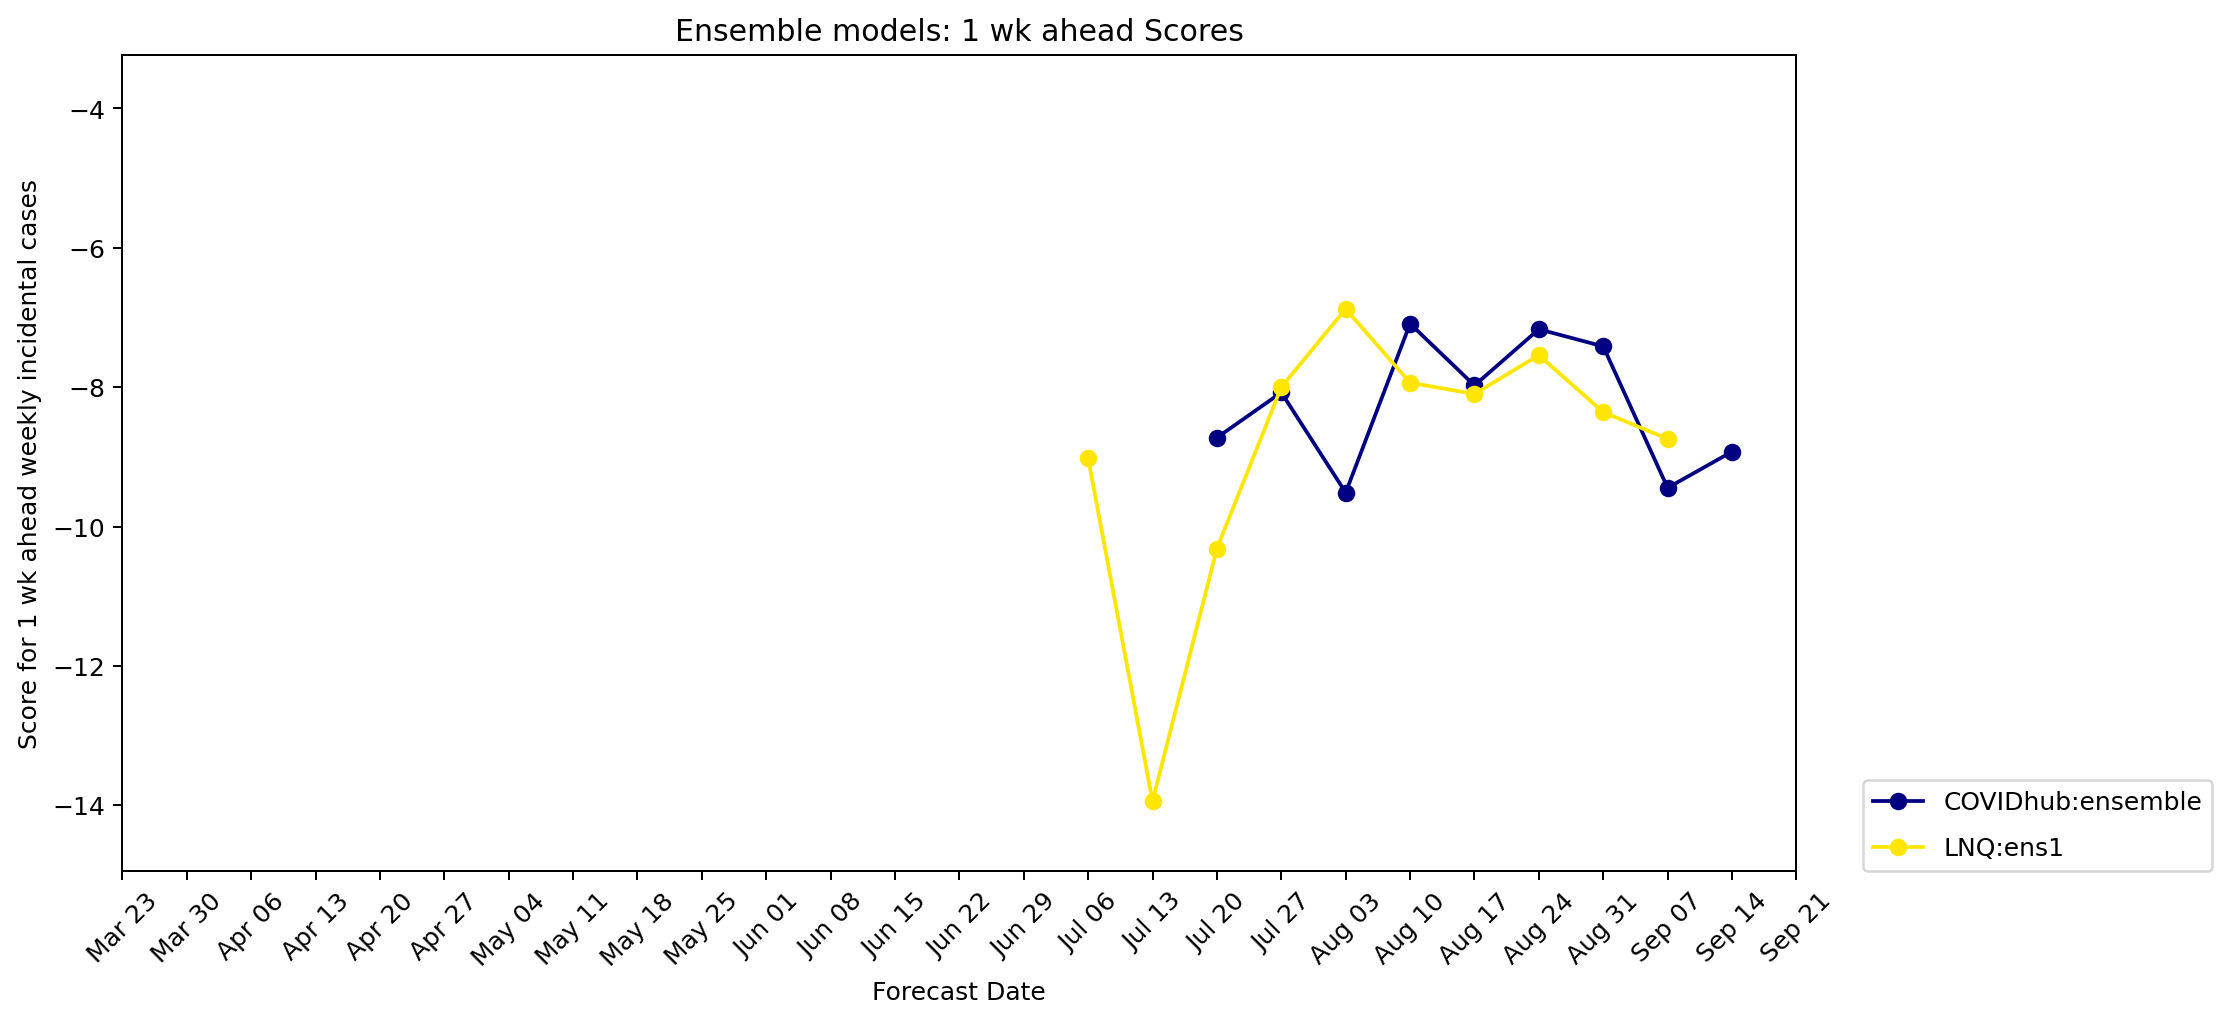

In [15]:
S19.plotgroupsFD(ScoreboardCases, modeltypesCases, figuresdirectory, 1, 'Case')

## Plots by target end date

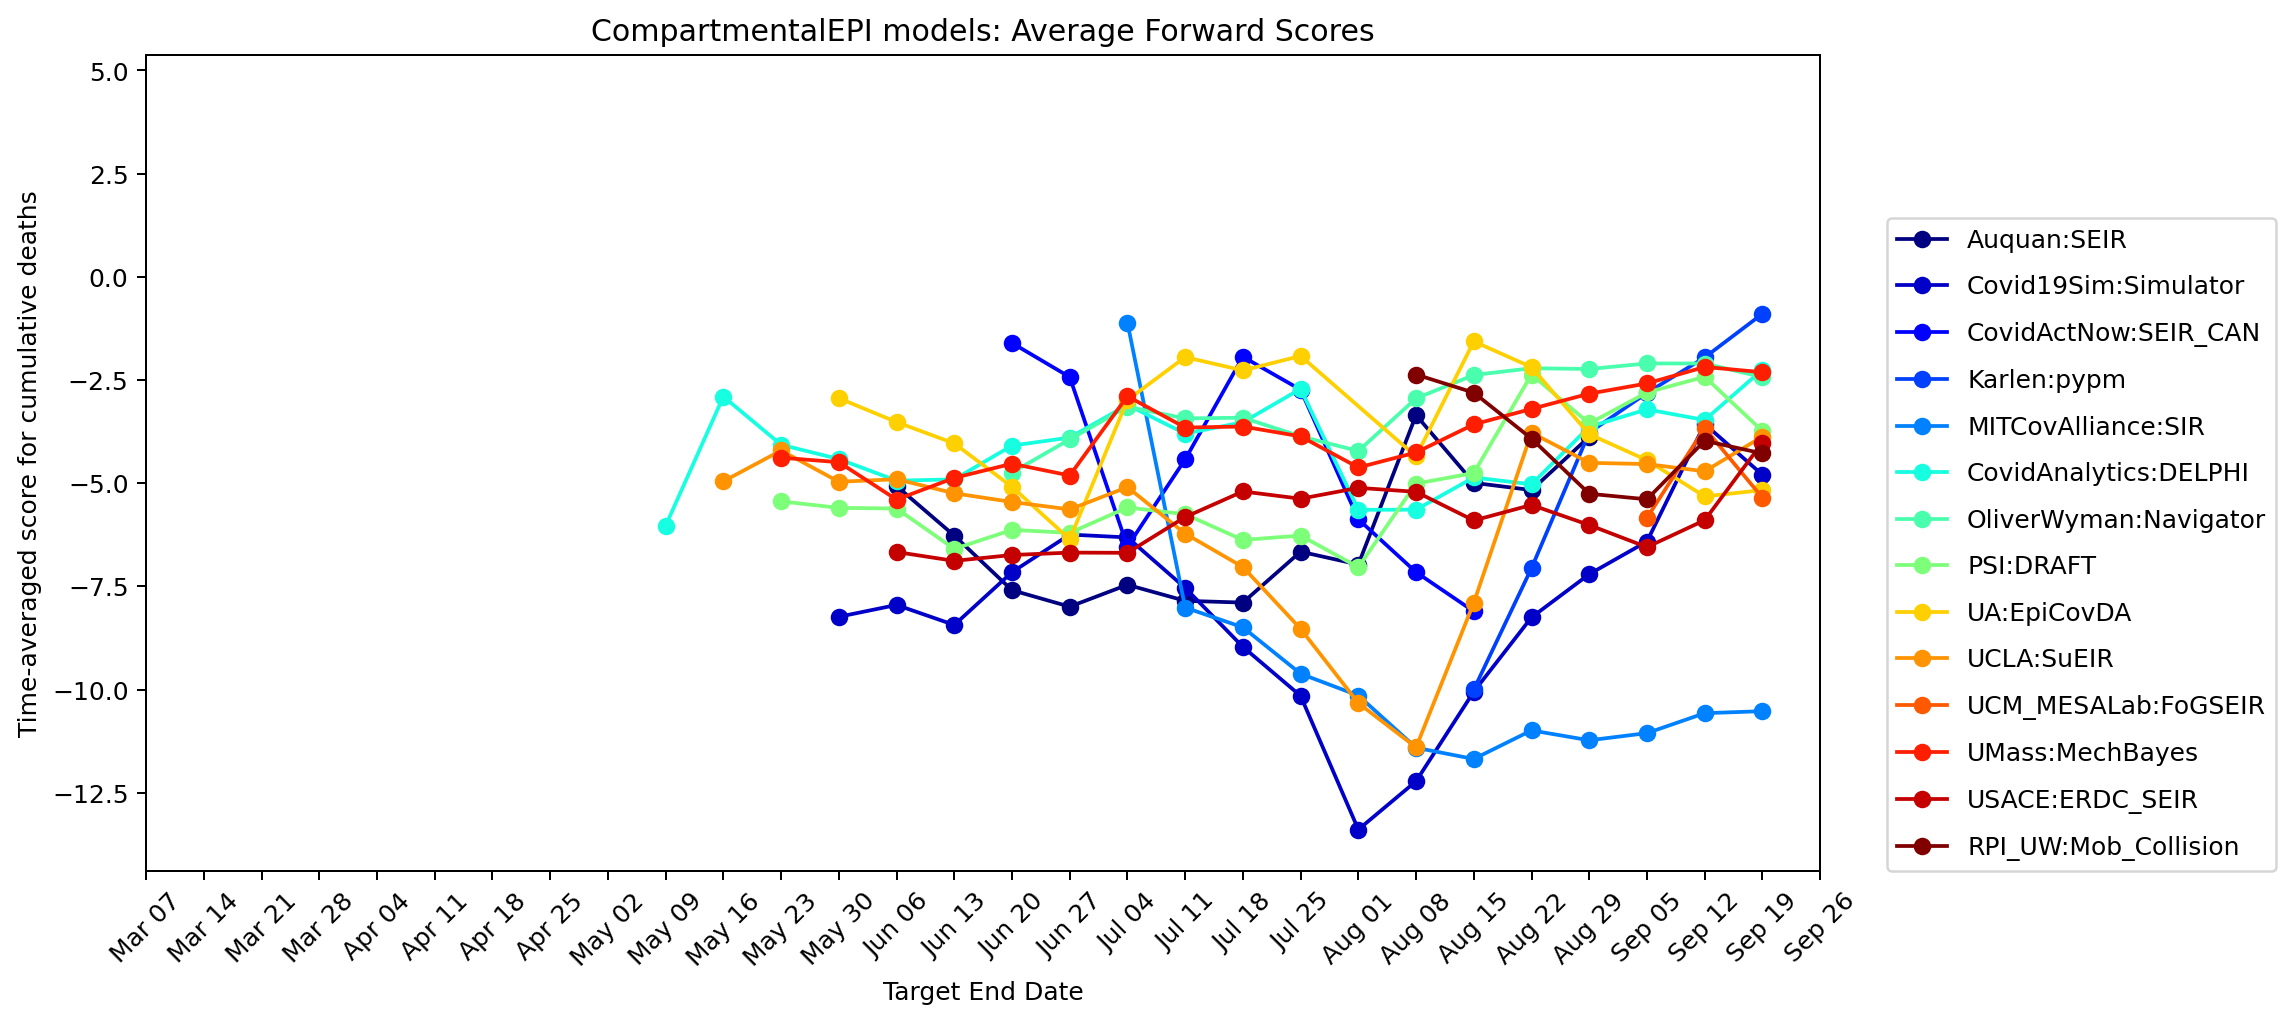

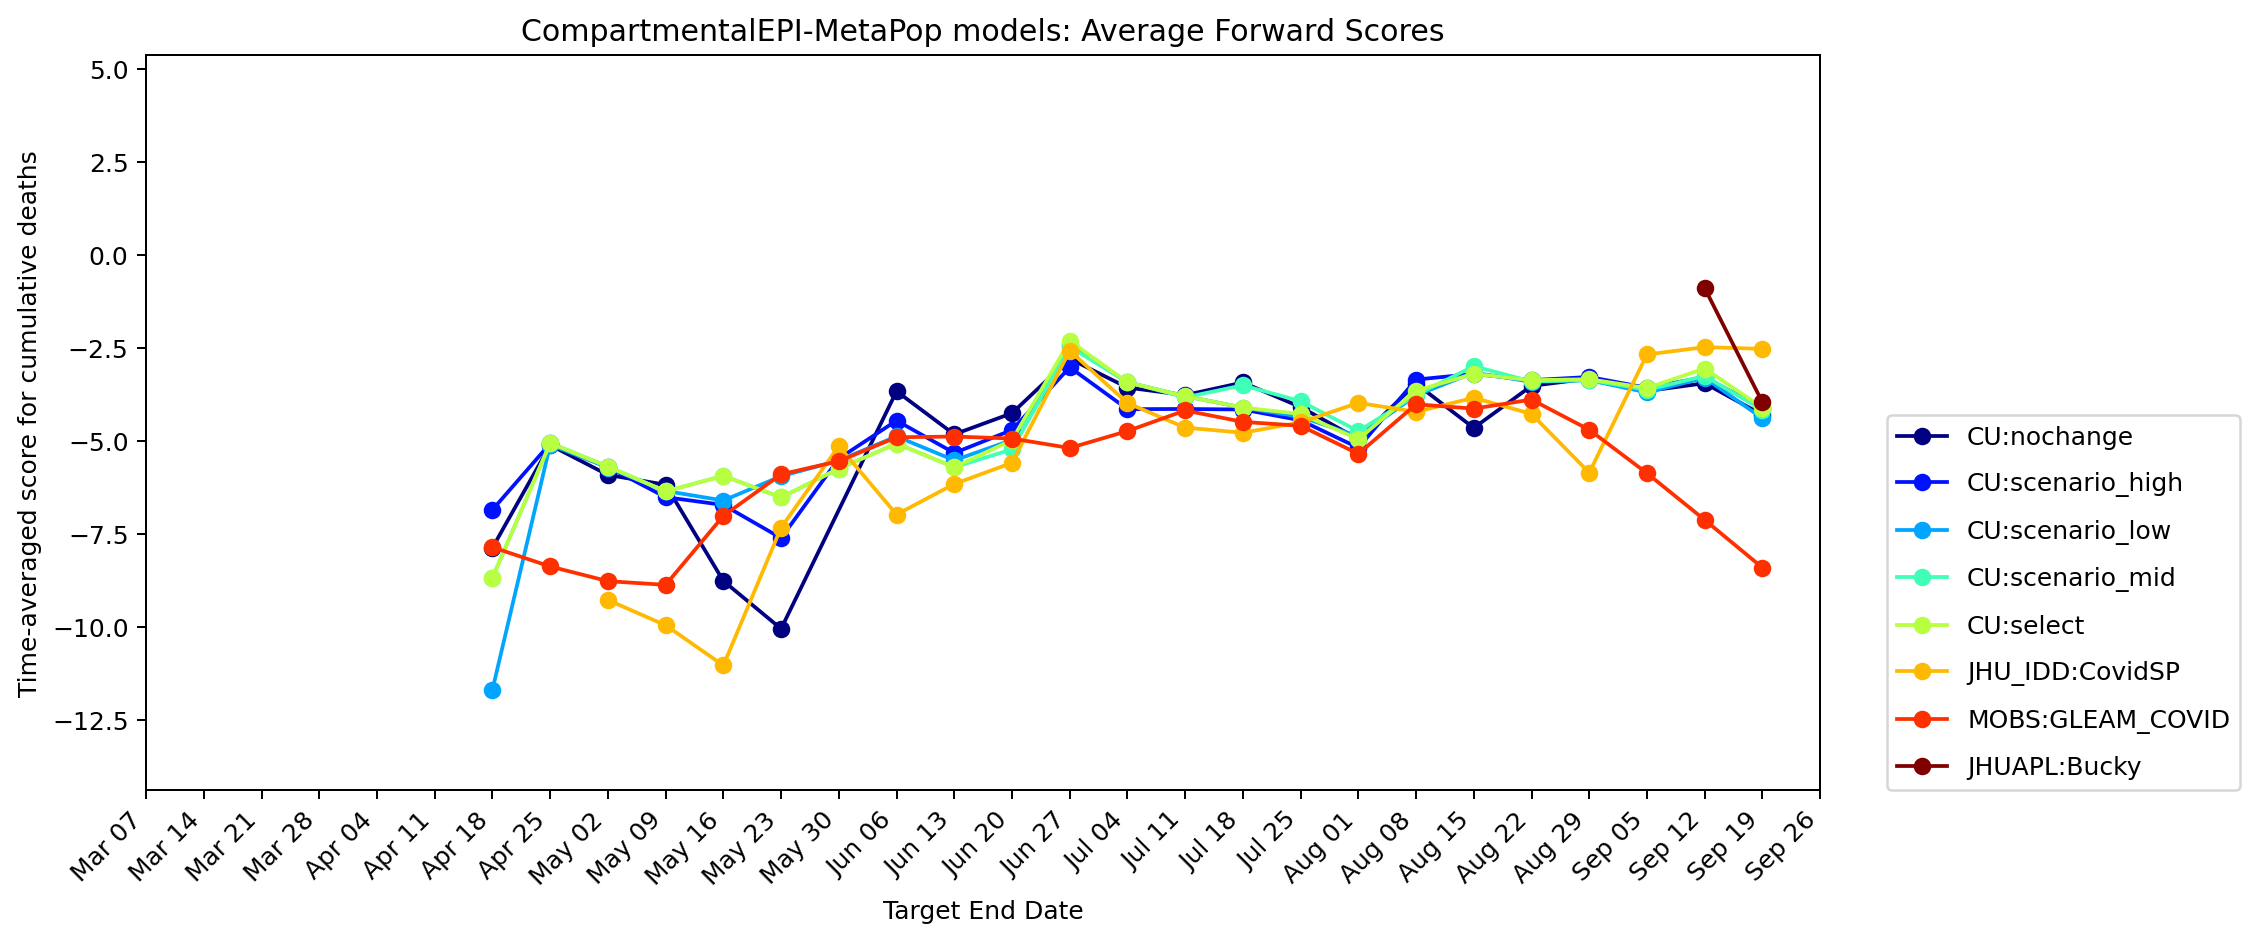

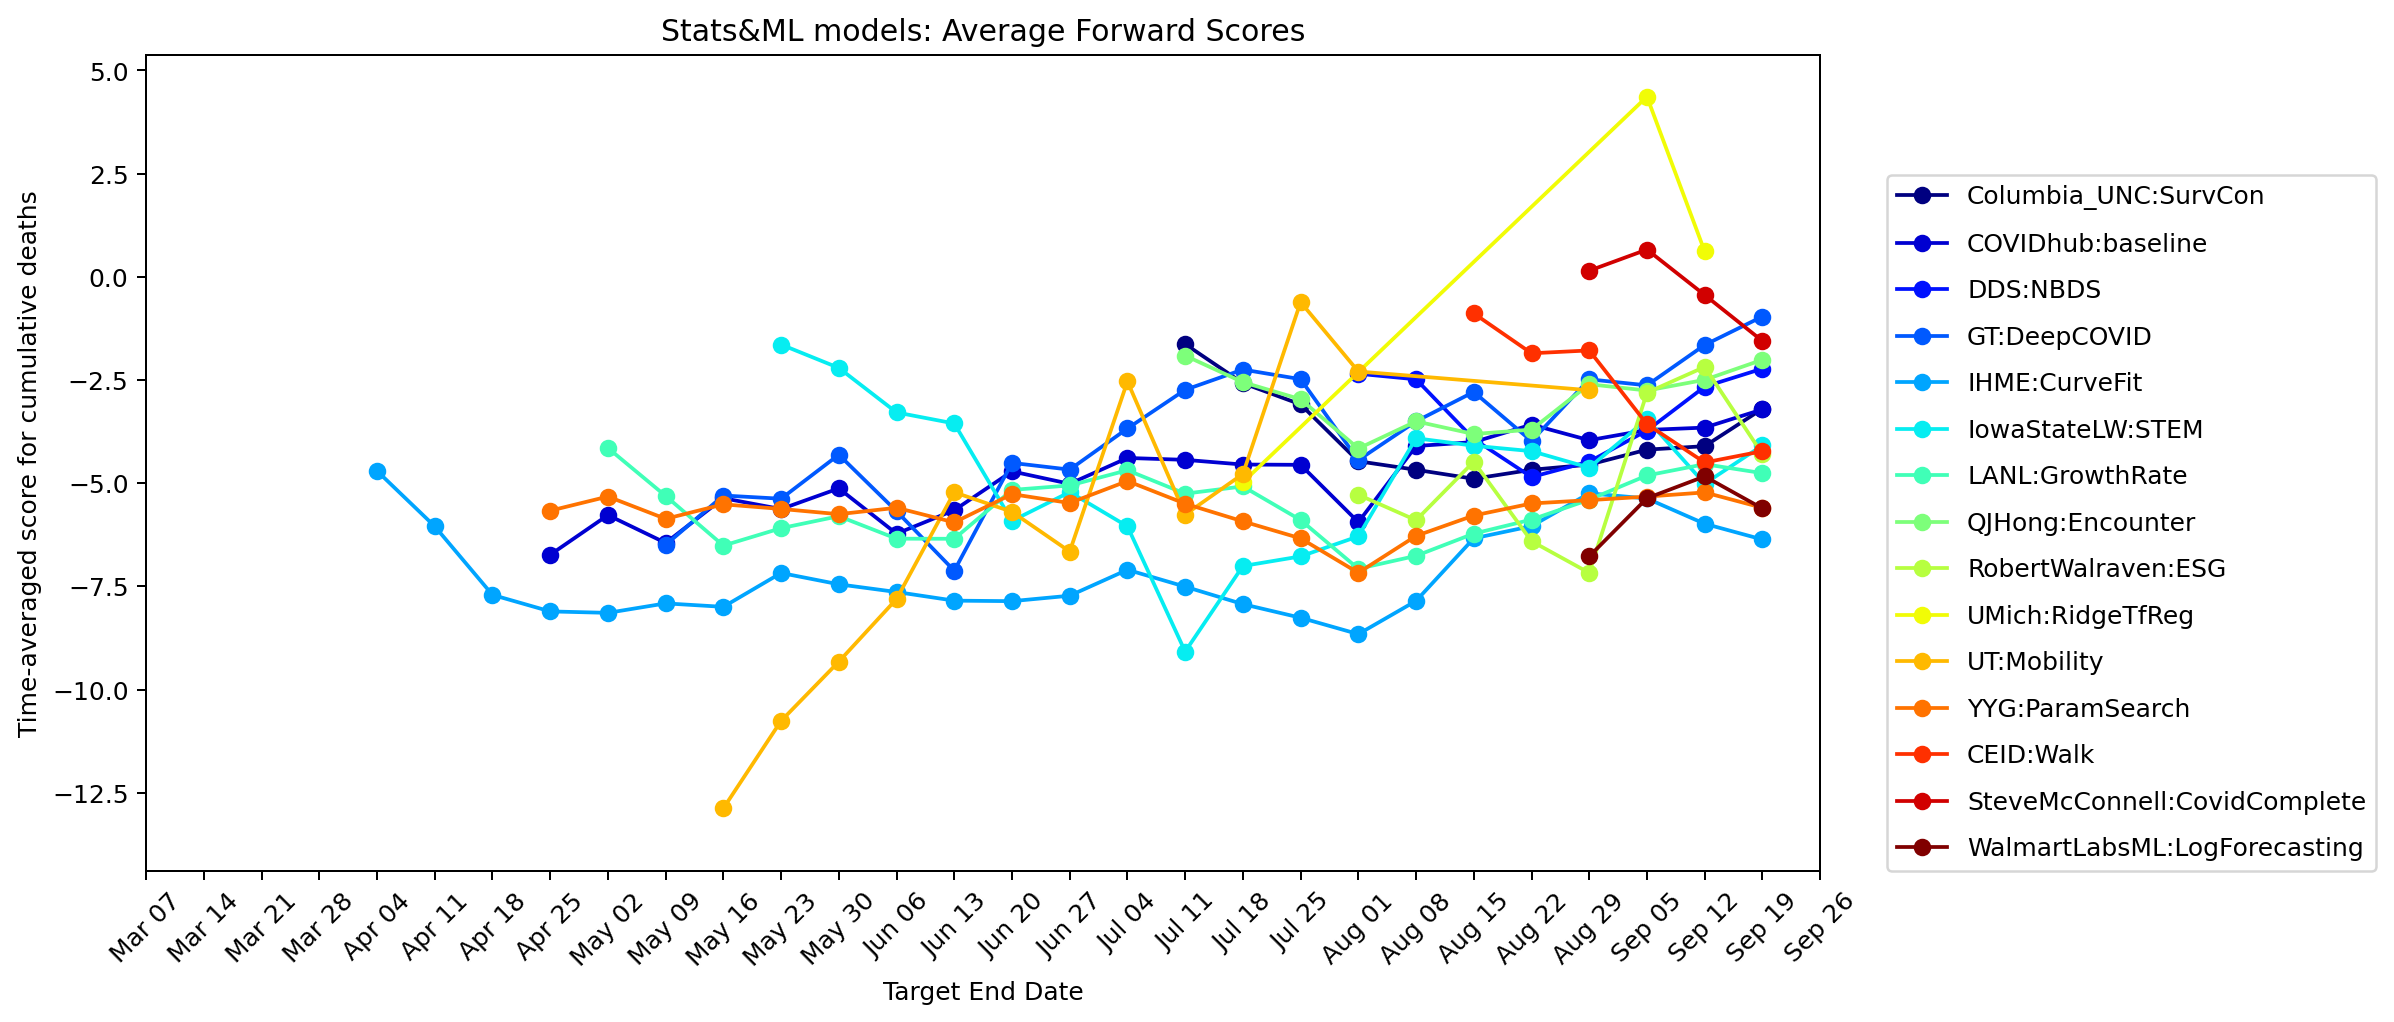

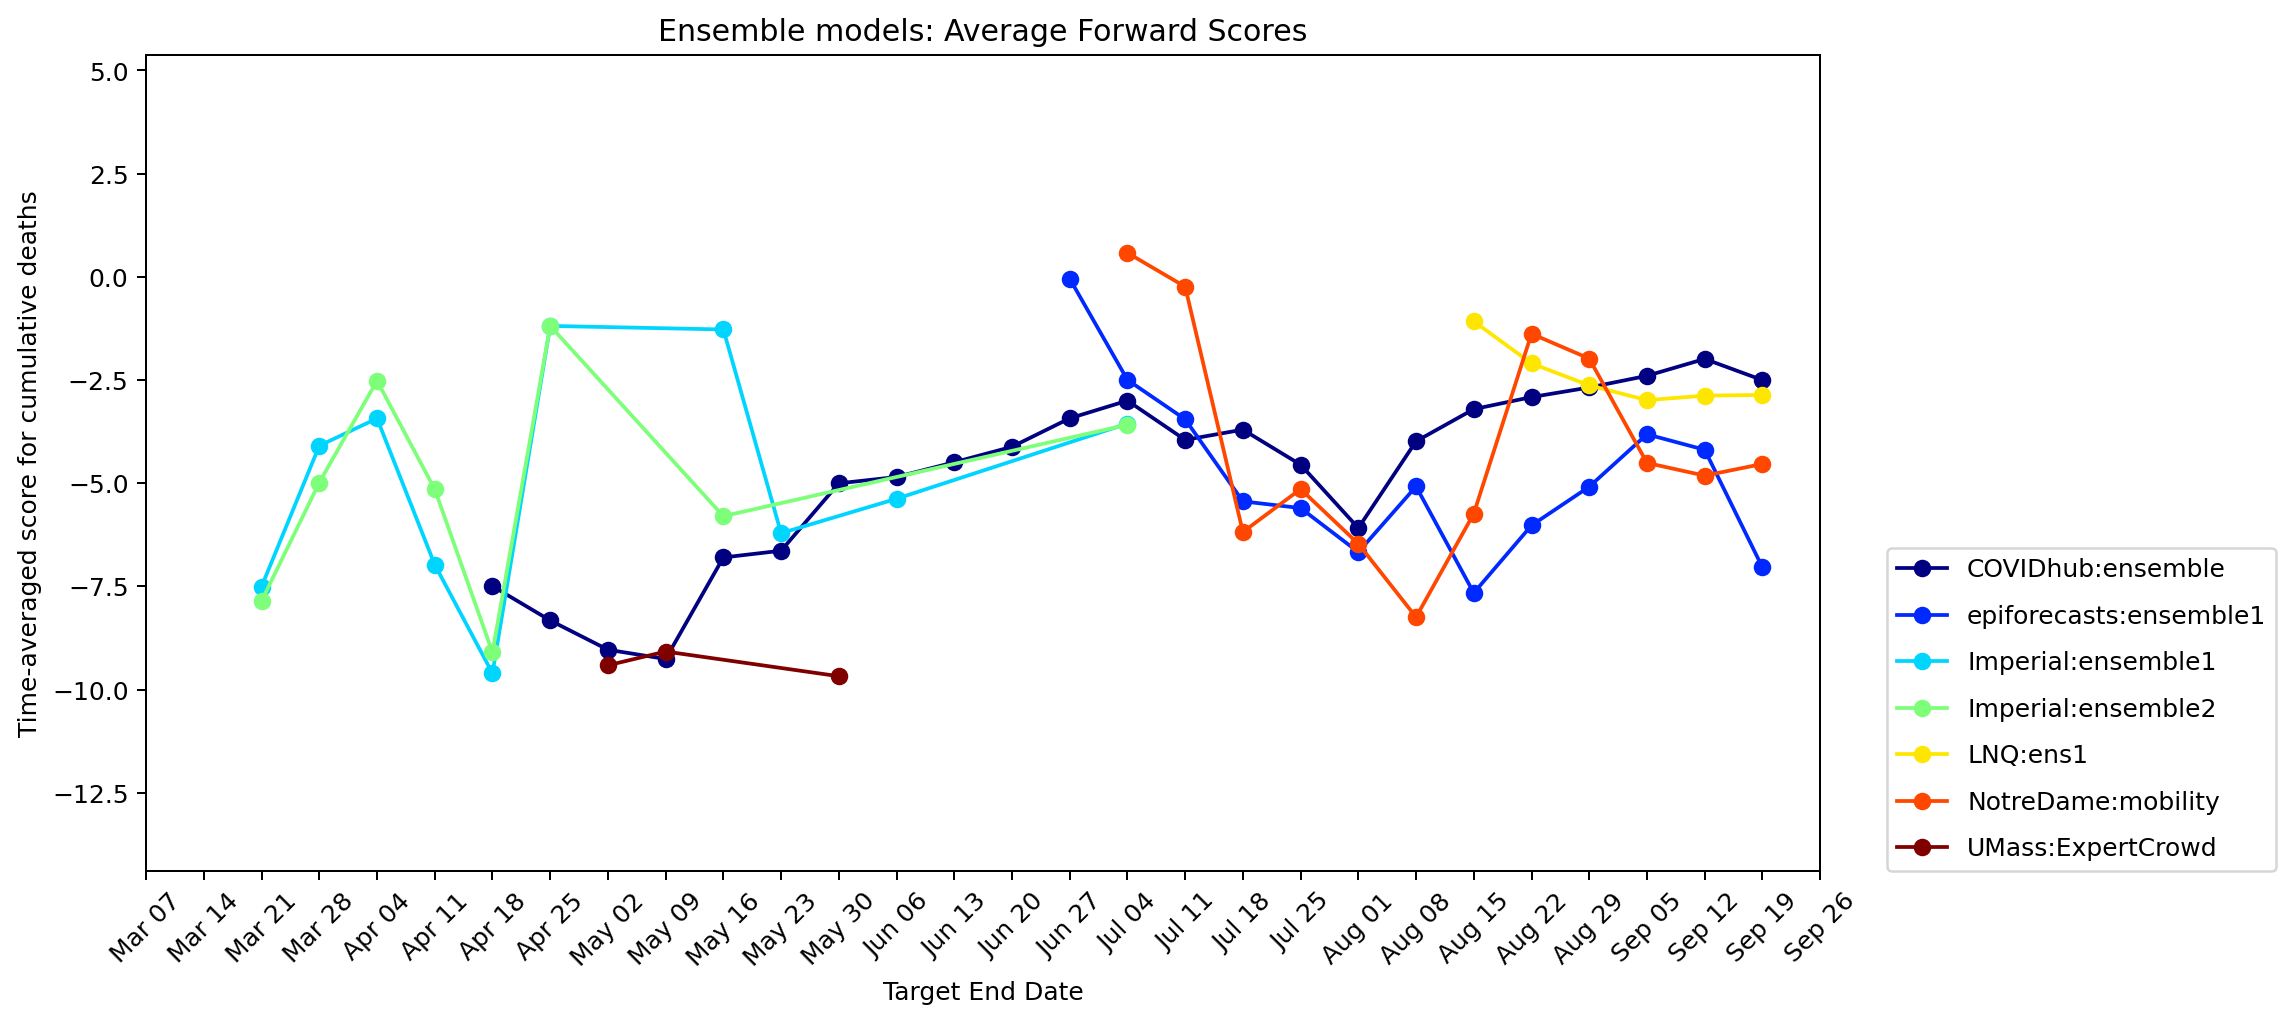

In [11]:
S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 'Death')

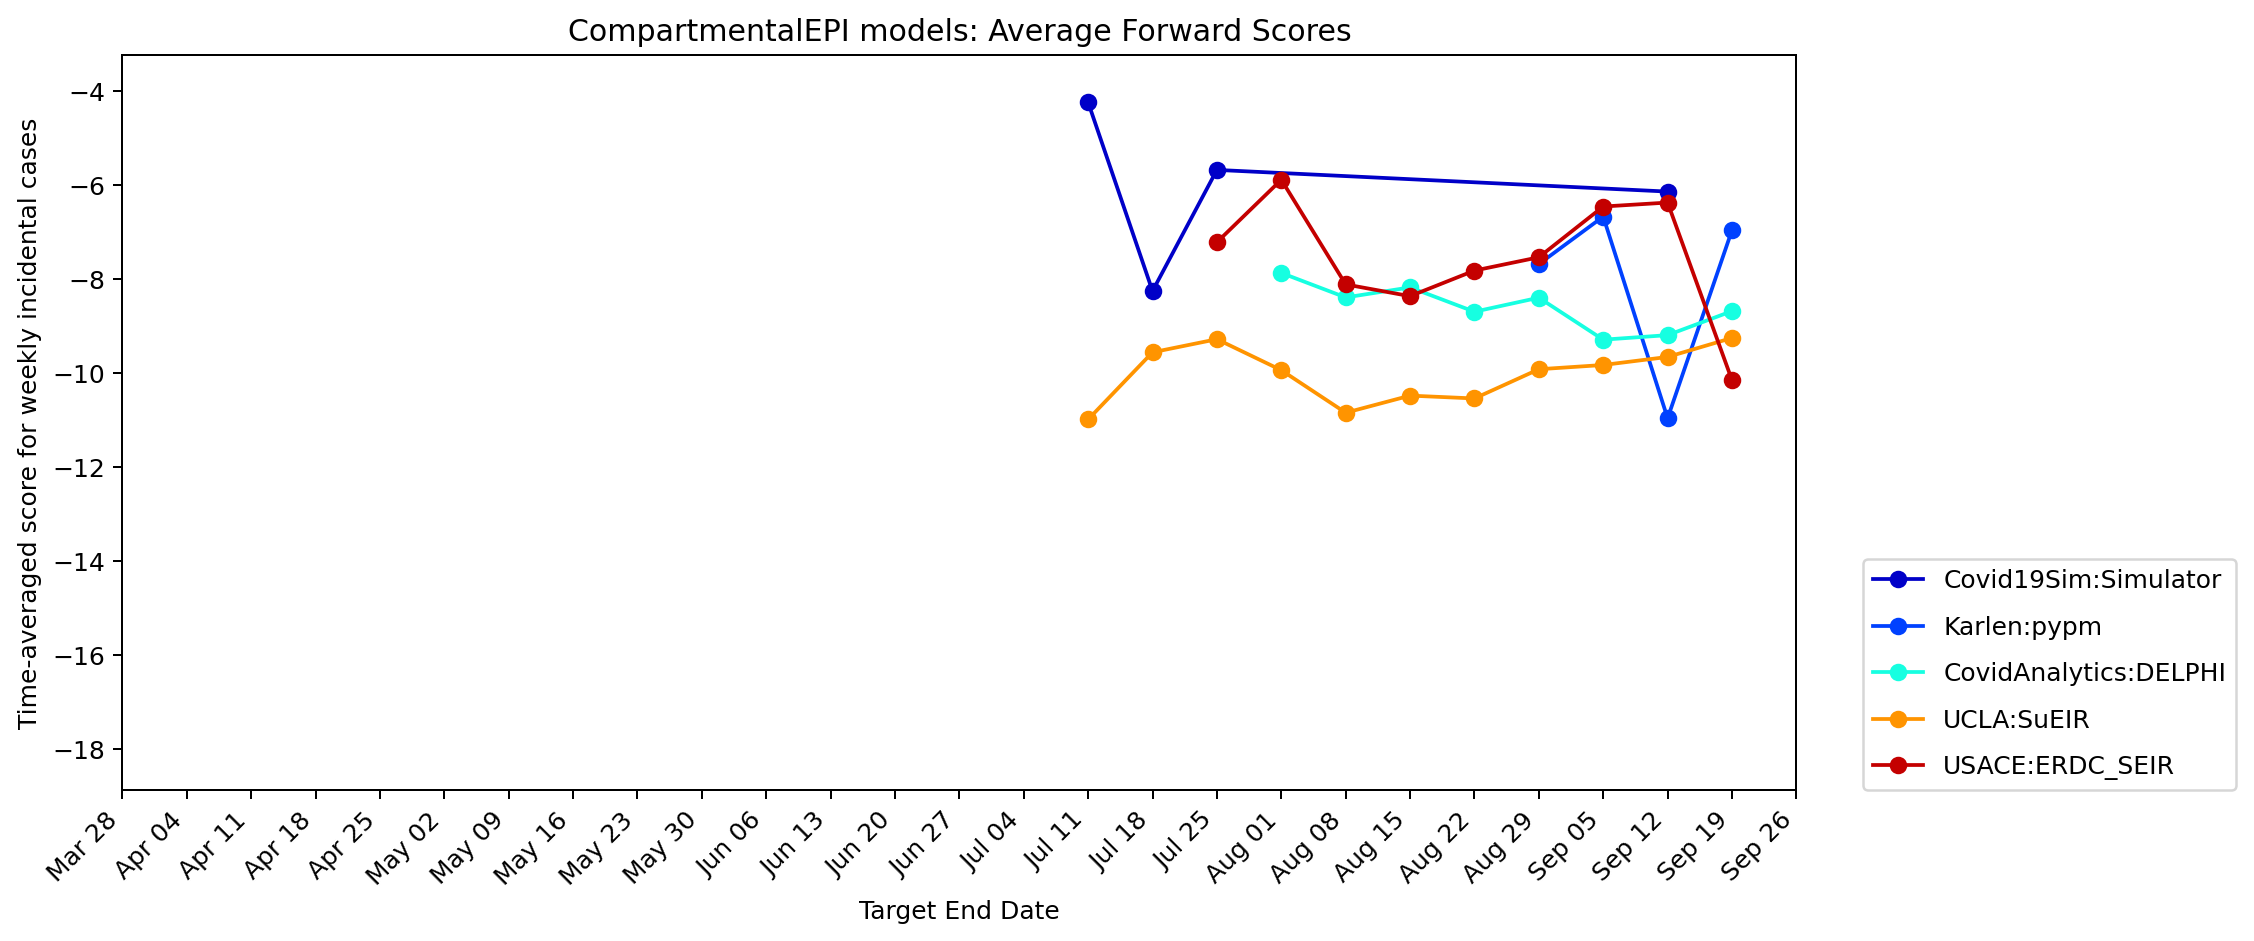

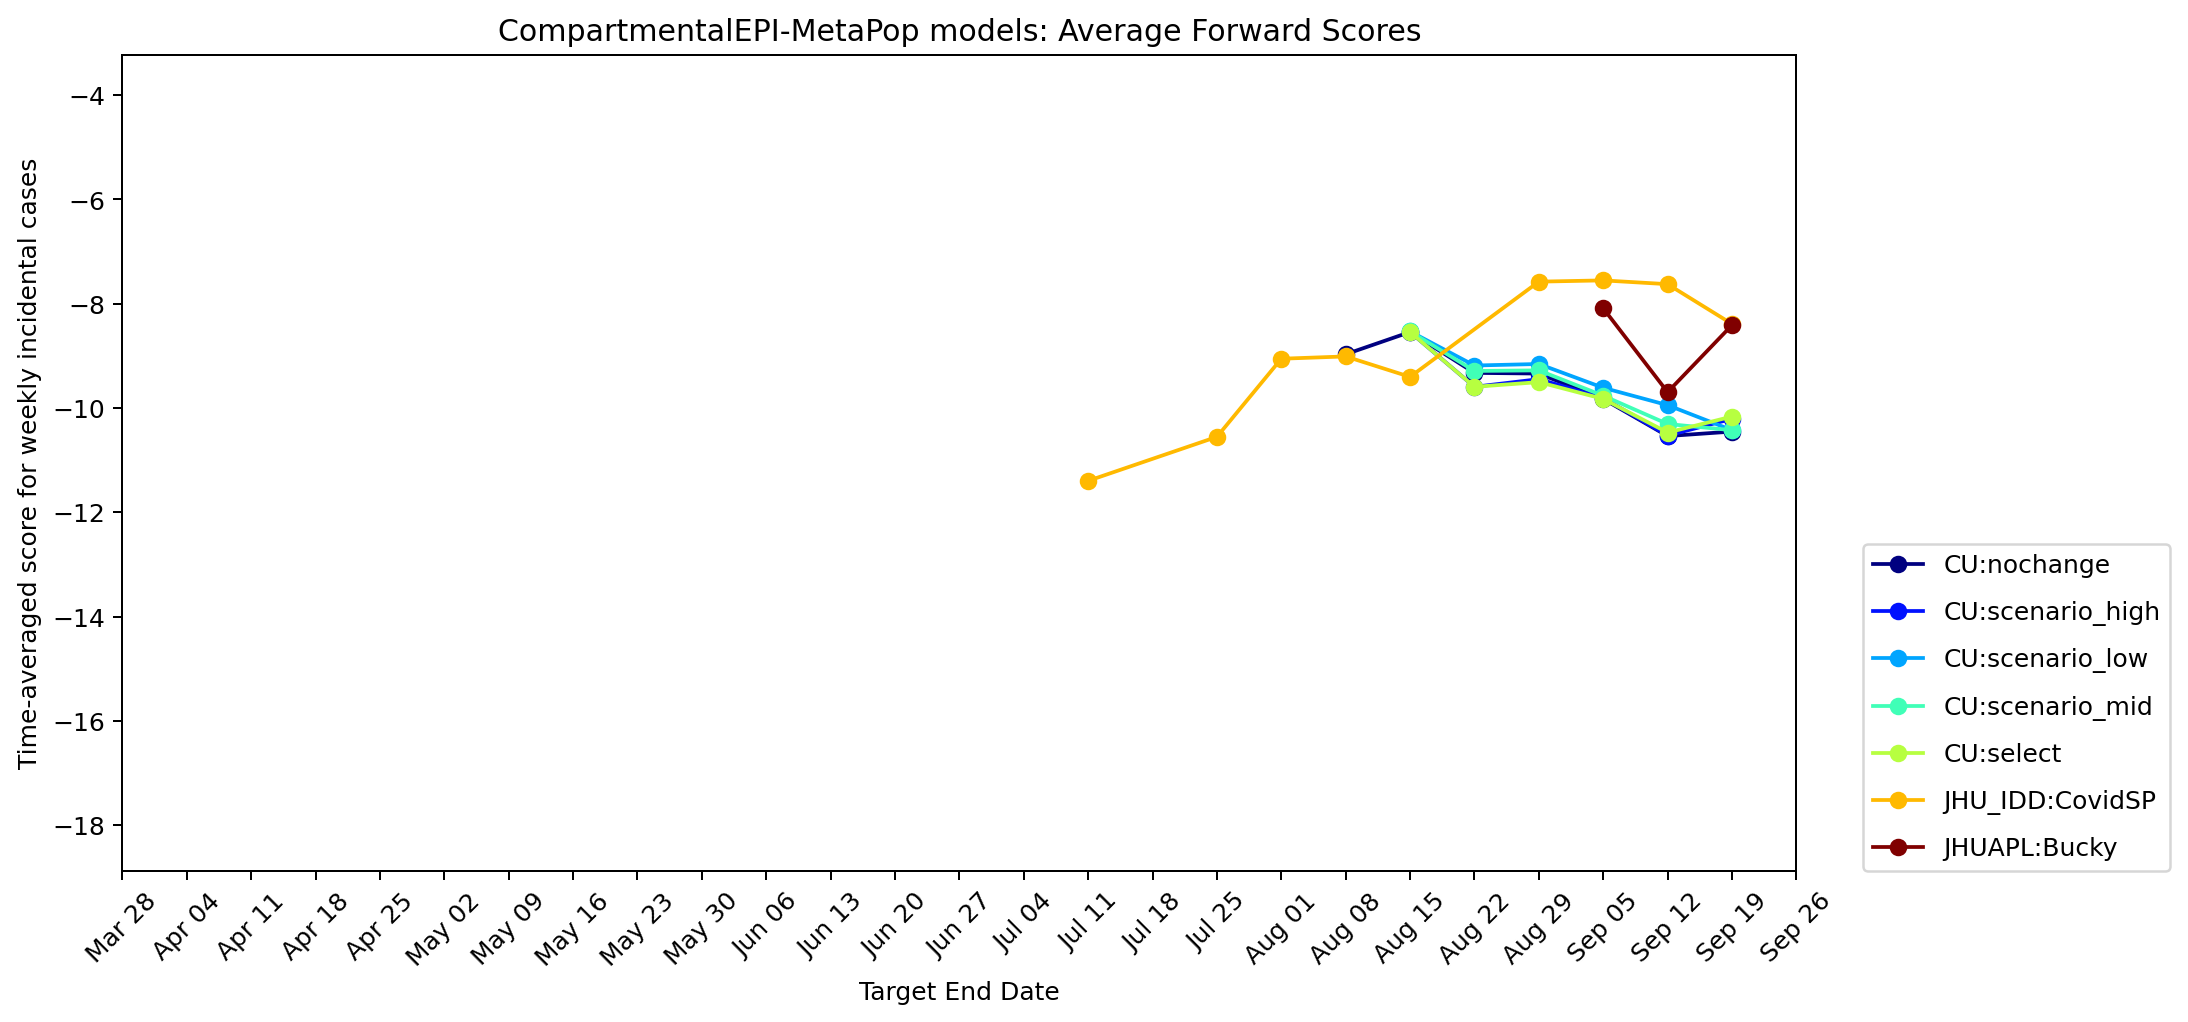

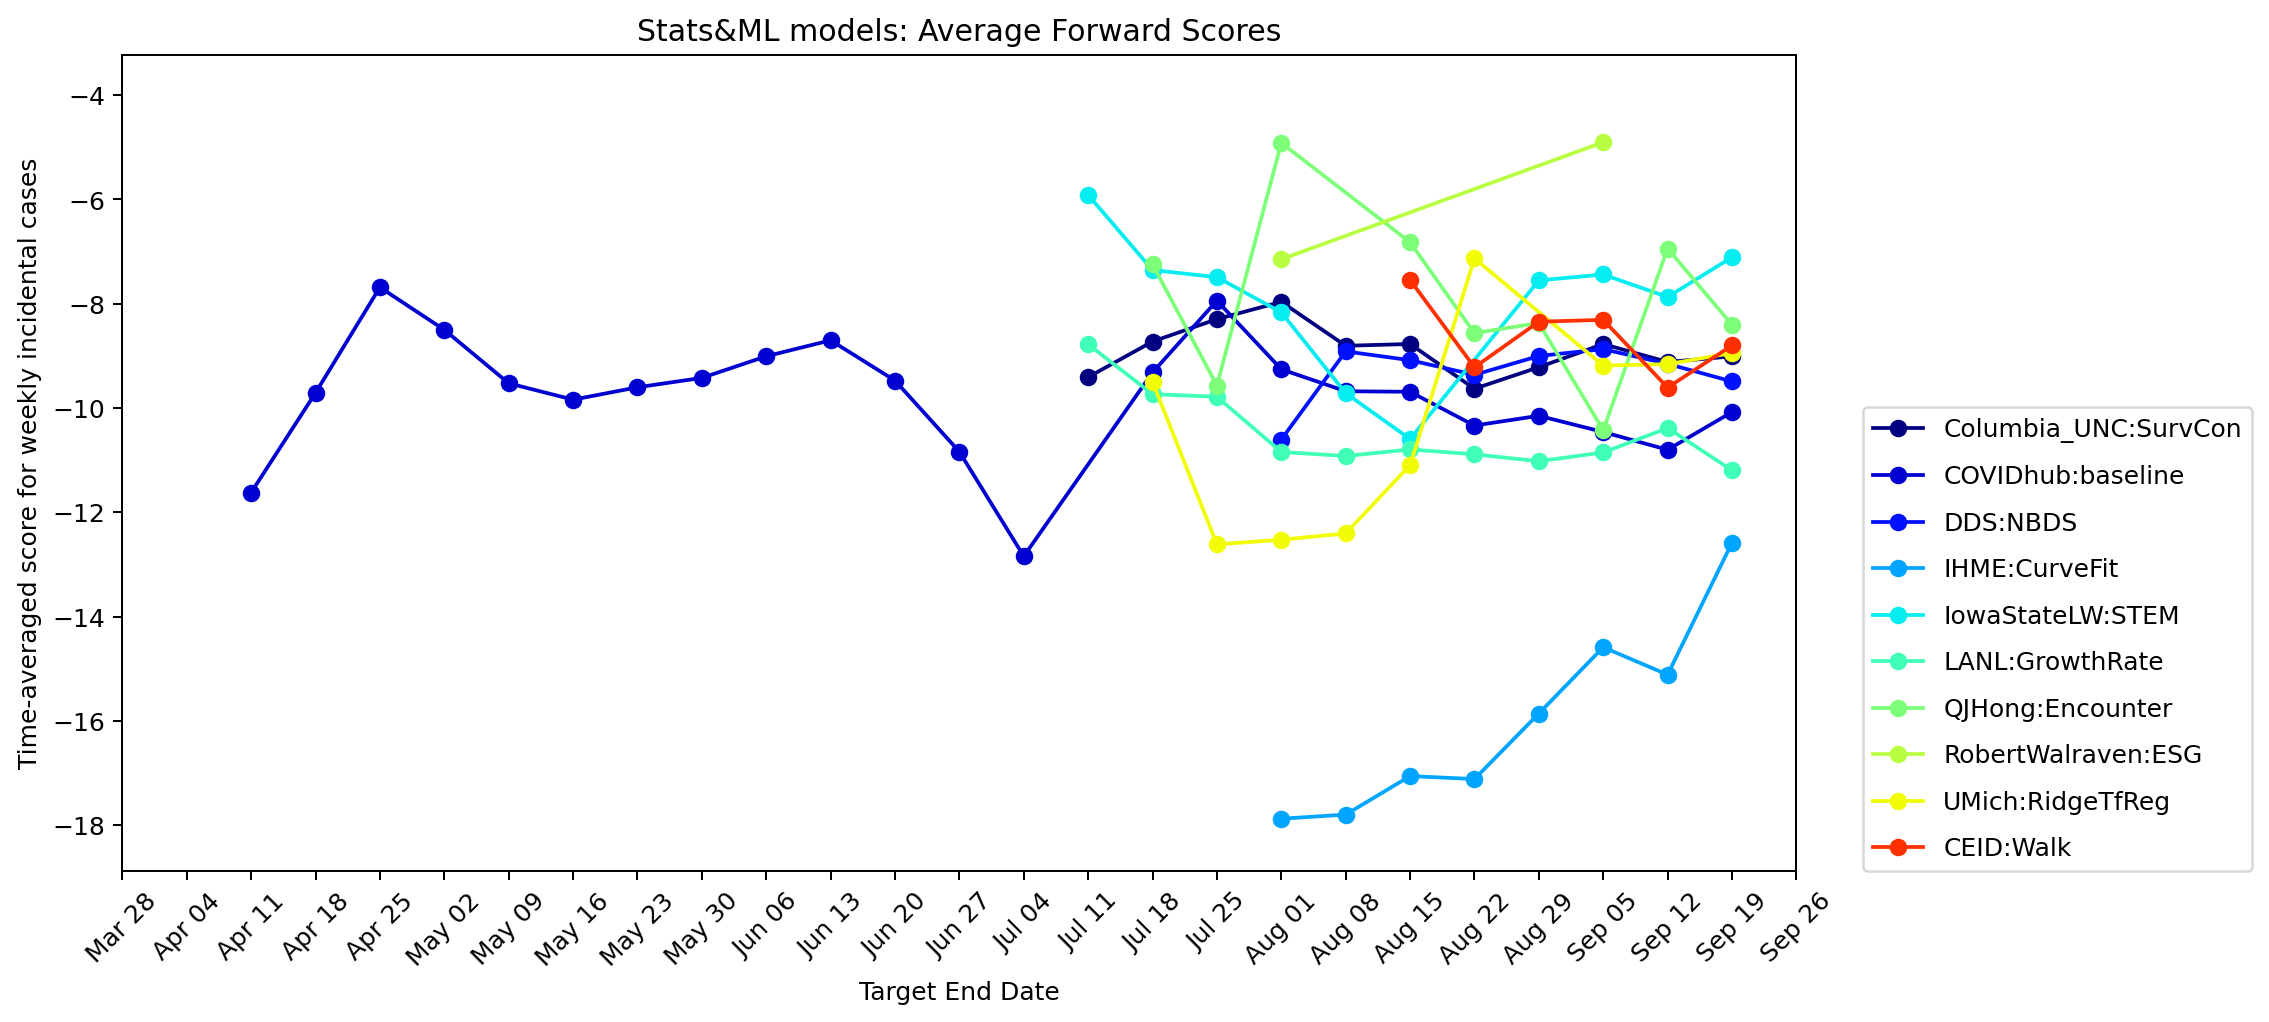

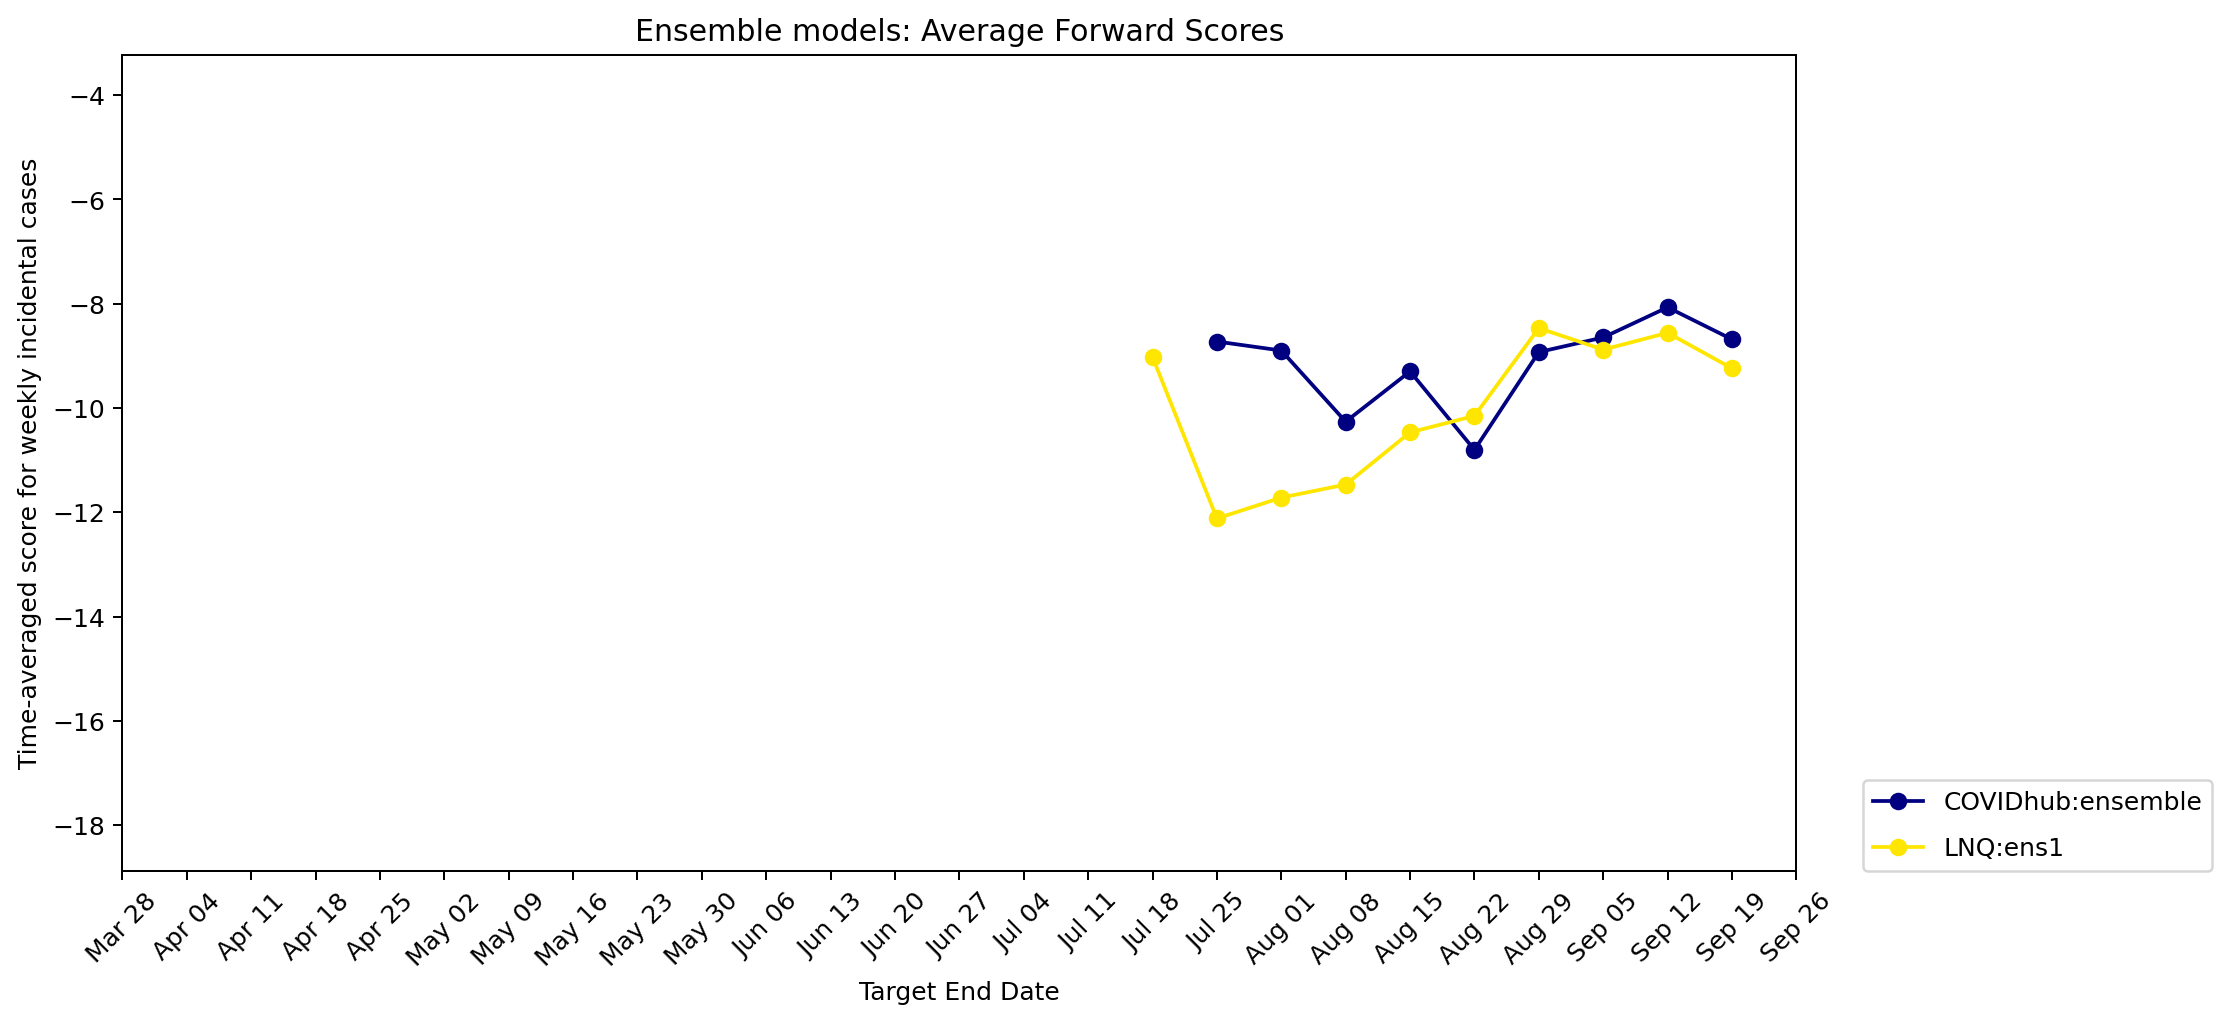

In [12]:
S19.plotgroupsTD(ScoreboardCases, modeltypesCases, figuresdirectory, 'Case')

### ADD TO GITHUB

In [ ]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
# !git stash
# !git pull --rebase origin master
!git add --all
!git commit -am “UpdateFigures”
!git push -u origin master
os.chdir(mypwd[0])